In [2]:
# loading libraries

library(ggplot2)
library(glue)
library(tidyverse)
library(gridExtra)
library(latex2exp)
library(moments)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ lubridate 1.9.2     ✔ tibble    3.2.1
✔ purrr     1.0.1     ✔ tidyr     1.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Caricamento pacchetto: ‘gridExtra’


Il seguente oggetto è mascherato da ‘package:dplyr’:

    combine




In [3]:
# plot settings

std_width  <- 12
std_height <- 8
options(repr.plot.width = std_width, repr.plot.height = std_height)

In [4]:
# plot colours

color_palette <- c( "#58508d",
                    "#bc5090",
                    "#ff6361",
                    "#ffa600" )

# Exercise 1

The number of claims received by an insurance company during a week follows a Poisson distribution with unknown mean $\mu$. The number of claims, per week, observed over a ten week period are:

$$ 5, 8, 4, 6, 11, 6, 6, 5, 6, 4 $$

#### 1. Suppose to use a prior uniform distribution for $\mu$

**a. find the posterior distribution for $\mu$ and compute the posterior mean, median and variance**

From Bayes' theorem, the posterior distribution for $\mu$, the mean of the Poisson distribution, can be expressed as

$$ P(\mu|\{y_i\}, H) = \frac{P(\{y_i\}|\mu, H) P(\mu|H)}{ \int P(\{y_i\}|\mu, H) P(\mu|H) d\mu} $$

where $\{y_i\}$ are our measurement data set and $H$ is the hypothesis that the process follows a Poisson distribution.

Having multiple independent measurements, the appropriate likelihood is the product of the likelihood for a single measurement of a Poisson process, i.e., we have a Gamma distribution function:

$$ \text{Gamma}(y|\alpha, \lambda) = k y^{\alpha -1}e^{-\lambda y}$$

with $k = \frac{\lambda^\alpha}{\Gamma(\alpha)}$, $\alpha = \sum_i y_i + 1$ and $\lambda = n$, where $n$ is the number of our measurements.

If the prior is a uniform distribution, we assume it to be $\mathcal{U}[0,20]$. Then, the posterior distribution of probability for $\mu$ has the same shape of the likelihood, the $\text{Gamma}$, that is normalized by definition:

$$ \text{Gamma}(\mu|\alpha, \lambda) = k \mu^{\alpha -1}e^{-\lambda \mu} $$

In [5]:
# measurements
y <- c(5, 8, 4, 6, 11, 6, 6, 5, 6, 4)
n <- 10

In [6]:
# values for parameter mu
mu <- seq(0,15, 0.001)

In [7]:
# gamma posterior parameters
alpha <- sum(y) + 1
lambda <- n

In [8]:
alpha

[1] 62

In [9]:
# gamma posterior distribution

post_gamma <- dgamma(x = mu, shape = alpha, rate = lambda)

The expected value of a $\text{Gamma}$ distribution is:

$$ E[X] = \frac{\alpha}{\lambda} $$

and the variance is 

$$ var[X] = \frac{\alpha}{\lambda^2} $$

In [10]:
# mean
mean_th_gamma <- alpha / lambda
mean_gamma <- integrate(function(x) dgamma(x, alpha, rate = lambda) * x, 0, 15)

# variance
var_th_gamma <- alpha / (lambda^2)
var_gamma <- integrate(function(x) dgamma(x, alpha, rate = lambda) * (x - mean_gamma$value)^2, 0, 15)

# median
med_gamma <- qgamma(0.5, shape = alpha, rate = lambda)

cat(glue("The mean and the variance of the distribution, calculated from theory, are respectively {round(mean_th_gamma,3)} and {round(var_th_gamma, 3)}."))
cat("\n")
cat(glue("The mean and variance of the distribution are respectively {round(mean_gamma$value,3)} and {round(var_gamma$value, 3)}. Moreover, the median is {round(med_gamma,3)}."))

The mean and the variance of the distribution, calculated from theory, are respectively 6.2 and 0.62.
The mean and variance of the distribution are respectively 6.2 and 0.62. Moreover, the median is 6.167.

**b. plot the posterior distribution and the $95\%$ credibility interval**

In [11]:
Alpha <- 0.05
lowLim <- Alpha/2
upLim <- 1 - Alpha/2

In [12]:
mu_min <- qgamma(lowLim, shape = alpha, rate = lambda)
mu_max <- qgamma(upLim, shape = alpha, rate = lambda)

In [13]:
mu_min
mu_max

[1] 4.753504

[1] 7.835705

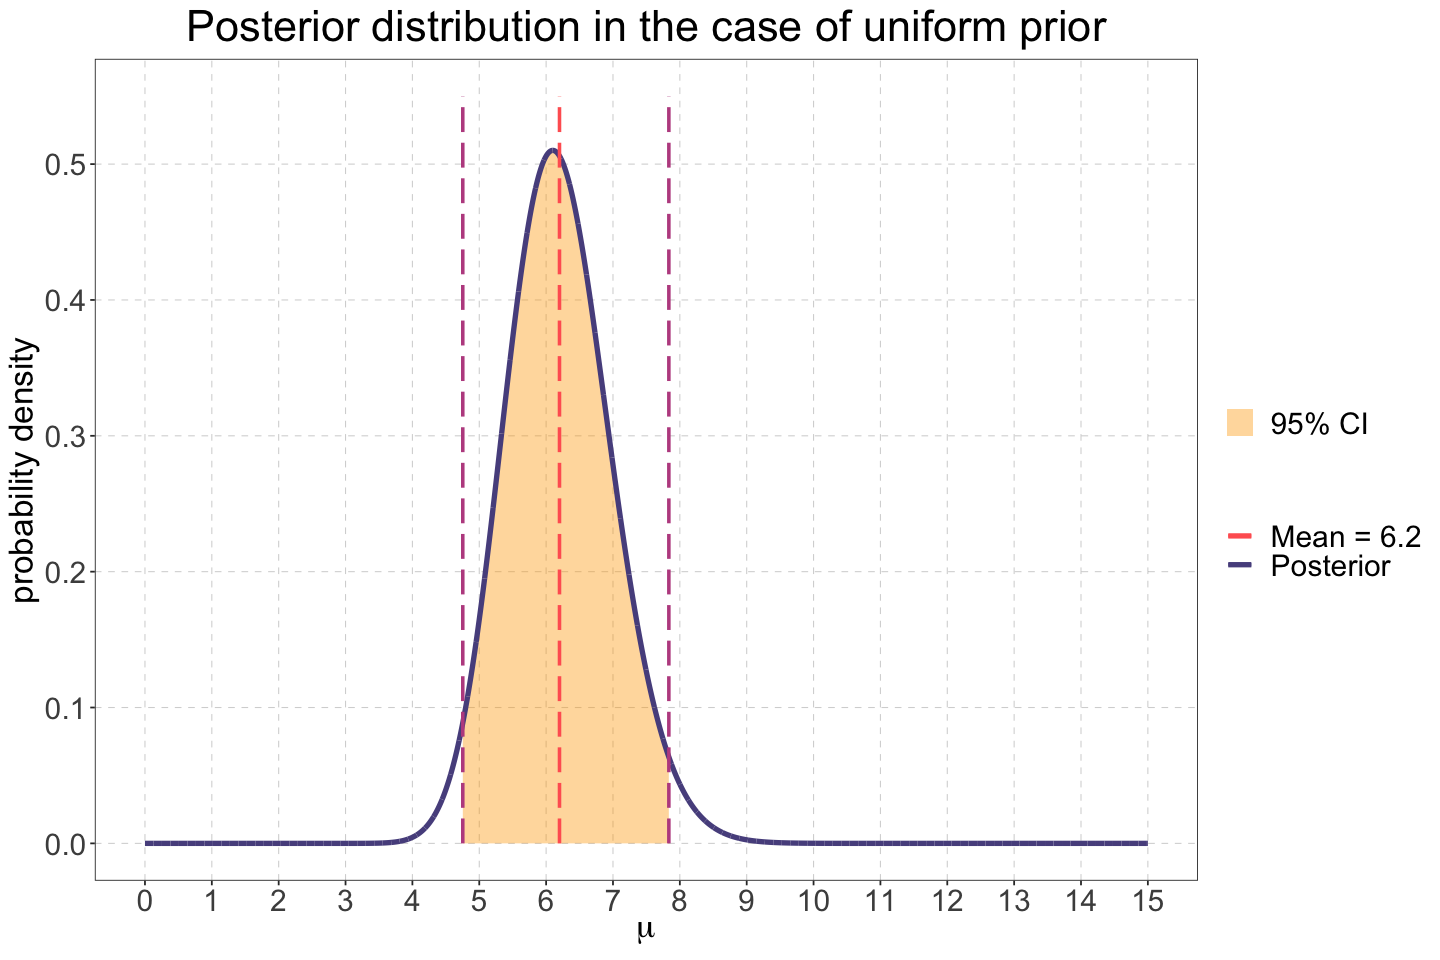

In [14]:
plot_post_gamma <- ggplot() + 
                   geom_area(
                    aes(
                        x = mu[mu > mu_min & mu < mu_max],
                        y = post_gamma[mu > mu_min & mu < mu_max],
                        fill = "95% CI"
                    ),
                    alpha = 0.4
                   ) +
                   geom_line(
                    aes(
                        x = mu, 
                        y = post_gamma,
                        color = "Posterior"),
                    linewidth = 1.5
                    ) + 
                    geom_segment(
                        aes( x = mu_min, y = 0, xend = mu_min, yend = 0.55),
                        color = color_palette[2],
                        linetype = "longdash",
                        linewidth = 1
                    ) +
                    geom_segment(
                        aes( x = mu_max, y = 0, xend = mu_max, yend = 0.55),
                        color = color_palette[2],
                        linetype = "longdash",
                        linewidth = 1
                    ) +
                    geom_segment(
                        aes( 
                            x = mean_gamma$value, 
                            y = 0, 
                            xend = mean_gamma$value, 
                            yend = 0.55,
                            color = "Mean = 6.2"
                            ),
                        linetype = "longdash",
                        linewidth = 1
                    ) 

plot_post_gamma <- plot_post_gamma +
        theme_bw() +
        theme( legend.position = "right",
        plot.title = element_text(size = 26, hjust = 0.5),
        axis.title = element_text(size = 20),
        axis.text  = element_text(size = 18),
        legend.title = element_text(size = 20, hjust = 0.5),
        legend.text  = element_text(size = 18),
        panel.grid.major.y = element_line( color = alpha("black",0.2),
                                           linewidth = 0.3,
                                           linetype = 2 ),
        panel.grid.major.x = element_line( color = alpha("black",0.2),
                                          linewidth = 0.3,
                                          linetype = 2 ),
        panel.grid.minor = element_blank(),
        panel.background = element_blank(),
        legend.background = element_rect( fill = "white",
                                          linewidth = 0.5, 
                                          linetype = "solid", 
                                          colour = "white" ) ) +
        labs( x = TeX("$\\mu$"), 
              y = "probability density", 
              title = "Posterior distribution in the case of uniform prior" ) +
        scale_color_manual(name = "", 
                        values = c("Posterior" = color_palette[1], "Mean = 6.2" = color_palette[3])) + 
        scale_fill_manual( name = "",
                           values = c("95% CI" = color_palette[4])) +
        scale_x_continuous(n.breaks = 15) +
        scale_y_continuous(n.breaks = 10)


plot_post_gamma

#### 2. Suppose do use a Jeffereys prior for $\mu$ ($g(\mu) \propto \frac{1}{\sqrt{\mu}}$)
**a. find the posterior distribution for $\mu$ and compute the posterior mean, median and variance**

If we have a Jeffereys prior:

$$ P(\mu|H) = k \frac{1}{\sqrt{\mu}}$$

where $k$ is the normalization constant, we have that the posterior distribution is a $\text{Gamma}(\alpha, \lambda)$:

$$ \text{Gamma}(\alpha, \lambda) = \frac{\lambda^{\alpha}}{\Gamma(\alpha)} \mu^{\alpha -1}e^{-\lambda \mu} $$

where $\alpha = \sum_i y_i + \frac{1}{2}$ and $\lambda = n$. Moreover, this distribution is normalized by definition.

In [15]:
# gamma posterior parameters
alpha_j <- sum(y) + 1/2
lambda_j <- n

In [16]:
alpha_j

[1] 61.5

In [17]:
# gamma posterior distribution
post_gamma_j <- dgamma(x = mu, shape = alpha_j, rate = lambda_j)

In [18]:
# mean
mean_th_gamma_j <- alpha_j/lambda_j
mean_gamma_j <- integrate(function(x) dgamma(x, alpha_j, rate = lambda_j) * x, 0, 15 )

# variance
var_th_gamma_j <- alpha_j/(lambda_j^2)
var_gamma_j <- integrate(function(x) dgamma(x, alpha_j, rate = lambda_j) * (x - mean_gamma_j$value)^2, 0, 15)

# median 
med_gamma_j <- qgamma(0.5, shape = alpha_j, rate = lambda_j)

cat(glue("The mean and the variance of the distribution, calculated from theory, are respectively {round(mean_th_gamma_j,3)} and {round(var_th_gamma_j, 3)}."))
cat("\n")
cat(glue("The mean and variance of the distribution are respectively {round(mean_gamma_j$value,3)} and {round(var_gamma_j$value, 3)}. Moreover, the median is {round(med_gamma_j,3)}."))

The mean and the variance of the distribution, calculated from theory, are respectively 6.15 and 0.615.
The mean and variance of the distribution are respectively 6.15 and 0.615. Moreover, the median is 6.117.

**b. plot the posterior distribution and the $95\%$ credibility interval**

In [19]:
mu_min_j <- qgamma(lowLim, shape = alpha_j, rate = lambda_j)
mu_max_j <- qgamma(upLim, shape = alpha_j, rate = lambda_j)

In [20]:
mu_min_j
mu_max_j

[1] 4.709748

[1] 7.77946

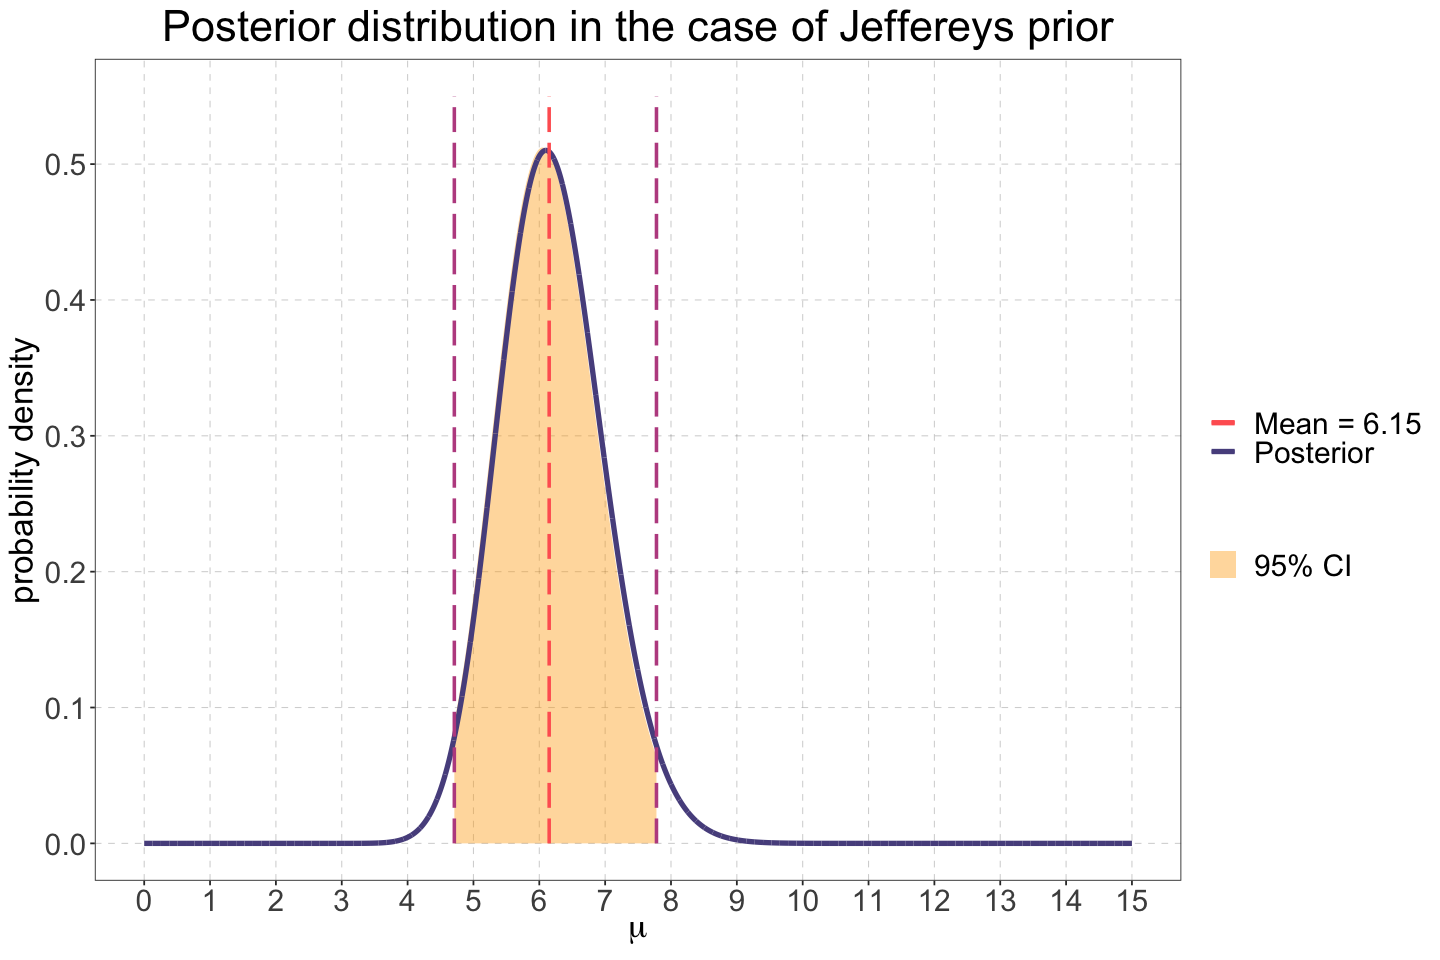

In [21]:
plot_post_gamma_j <- ggplot() + 
                   geom_area(
                    aes(
                        x = mu[mu > mu_min_j & mu < mu_max_j],
                        y = post_gamma_j[mu > mu_min_j & mu < mu_max_j],
                        fill = "95% CI"
                    ),
                    alpha = 0.4
                   ) +
                   geom_line(
                    aes(
                        x = mu, 
                        y = post_gamma,
                        color = "Posterior"),
                    linewidth = 1.5
                    ) + 
                    geom_segment(
                        aes( x = mu_min_j, y = 0, xend = mu_min_j, yend = 0.55),
                        color = color_palette[2],
                        linetype = "longdash",
                        linewidth = 1
                    ) +
                    geom_segment(
                        aes( x = mu_max_j, y = 0, xend = mu_max_j, yend = 0.55),
                        color = color_palette[2],
                        linetype = "longdash",
                        linewidth = 1
                    ) +
                    geom_segment(
                        aes( 
                            x = mean_gamma_j$value, 
                            y = 0, 
                            xend = mean_gamma_j$value, 
                            yend = 0.55,
                            color = "Mean = 6.15"
                            ),
                        linetype = "longdash",
                        linewidth = 1
                    ) 

plot_post_gamma_j <- plot_post_gamma_j +
        theme_bw() +
        theme( legend.position = "right",
        plot.title = element_text(size = 26, hjust = 0.5),
        axis.title = element_text(size = 20),
        axis.text  = element_text(size = 18),
        legend.title = element_text(size = 20, hjust = 0.5),
        legend.text  = element_text(size = 18),
        panel.grid.major.y = element_line( color = alpha("black",0.2),
                                           linewidth = 0.3,
                                           linetype = 2 ),
        panel.grid.major.x = element_line( color = alpha("black",0.2),
                                          linewidth = 0.3,
                                          linetype = 2 ),
        panel.grid.minor = element_blank(),
        panel.background = element_blank(),
        legend.background = element_rect( fill = "white",
                                          linewidth = 0.5, 
                                          linetype = "solid", 
                                          colour = "white" ) ) +
        labs( x = TeX("$\\mu$"), 
              y = "probability density", 
              title = "Posterior distribution in the case of Jeffereys prior" ) +
        scale_color_manual(name = "", 
                        values = c("Posterior" = color_palette[1], "Mean = 6.15" = color_palette[3])) + 
        scale_fill_manual( name = "",
                           values = c("95% CI" = color_palette[4])) +
        scale_x_continuous(n.breaks = 15) +
        scale_y_continuous(n.breaks = 10)


plot_post_gamma_j

#### 3. Evaluate a $95\%$ credibility interval for the results obtained with both priors; compare the result with that obtained using a normal approximation for the posterior distribution, with the same mean and standard deviation

We compute a normal approximation for the posterior both in the case of uniform prior and Jeffereys prior. We assume as parameters for the normal approximation the mean and the square root of the variance calculated from the distribution.

Then, we summarize all our results.

In [22]:
# uniform prior

# normal approximation parameters
mu_uni <- mean_gamma$value
sigma_uni <- sqrt(var_gamma$value)

# normal approximation posterior
norm_uni <- dnorm(mu, mu_uni, sigma_uni)

# 95% CI
mu_min_norm_uni <- qnorm(lowLim, mu_uni, sigma_uni)
mu_max_norm_uni <- qnorm(upLim, mu_uni, sigma_uni)

In [23]:
mu_min_norm_uni
mu_max_norm_uni

[1] 4.656723

[1] 7.743277

In [24]:
# jeffereys prior

# normal approximation parameters
mu_j <- mean_gamma_j$value
sigma_j <- sqrt(var_gamma_j$value)

# normal approximation posterior
norm_j <- dnorm(mu, mu_j, sigma_j)

# 95% CI
mu_min_norm_j <- qnorm(lowLim, mu_j, sigma_j)
mu_max_norm_j <- qnorm(upLim, mu_j, sigma_j)

In [25]:
mu_min_norm_j
mu_max_norm_j

[1] 4.612958

[1] 7.687042

Summarizing our results, we get:

| prior | posterior | mean | variance | $95\%\,\text{CI}$ |
|------ | --------- | ---- | -------- | ----------------- |
| $\mathcal{U}[0,20]$ | $\text{Gamma}(\mu\|\alpha=62, \lambda=10)$ | 6.20 | 0.62 | 4.75 - 7.84 | 
| Jeffereys | $\text{Gamma}(\mu\|\alpha=61.5, \lambda=10)$ | 6.150 | 0.615 | 4.710 - 7.779 |
| $\mathcal{U}[0,20]$ | $\text{Norm}(\mu\|\mu_{norm}=6.20, \sigma^2=0.62)$ | 6.20 | 0.62 | 4.66 - 7.74 | 
| Jeffereys | $\text{Norm}(\mu\|\mu_{norm}=6.150, \sigma^2=0.615)$ | 6.150 | 0.615 | 4.613 - 7.687 |

We can observe that, since normal distributions are symmetrical and Gamma distribution slightly positively skewed, the CI are slightly different, but very close, and this is because the number of observations (10) is quite large.

------------------------------------------------------------------------------

# Exercise 2: blood disease

A well established and diffused method for detecting a disease in blood fails to detect the presence of disease in 15% of the patients that actually have the disease. A young UniPD startUp has developed an innovative method of screening. During the qualification phase, a random sample of $n = 75$ patients known to have the disease is screened using the new method.

#### 1. What is the probability distribution of $y$, the number of times the new method fails to detect the disease?

The probability distribution of the number of times the new method fails to detect the disease follows a Binomial distribution with $\pi$ as the probability of failure.

#### 2. On the $n = 75$ patients sample, the new method fails to detect the disease in $y = 6$ cases. What is the **frequentist estimator** of the failure probability of the new method?

The frequentist estimator for the probability of failure is:

$$ \pi_F = \frac{y}{n} $$

In [26]:
# sample dimension
n_blood_disease <- 75

# detection failure
y_failure <- 6

In [27]:
pi_freq <- y_failure/n_blood_disease

cat(glue("The frequentist estimator of the failure probability is {round(pi_freq,3)}."))

The frequentist estimator of the failure probability is 0.08.

#### 3. Setup a bayesian computation of the posterior probability, assuming a $\text{Beta}$ distribution with mean value $0.15$ and standard deviation $0.14$. Plot the posterior distribution for $\pi$, and mark on the plot the mean value and variance

Following Bayes' theorem, we have that the posterior distribution for $\pi$, the probability of failure of the test in detecting the disease is

$$ P(\pi|D, H) = \frac{ P(D|\pi, H) P(H)}{P(D)} $$

where $D$ is our data and $H$ is the hypothesis that $D$ follows a Binomial distribution; $P(D|\pi, H)$ is the likelihood, $P(D)$ is the evidence and $P(H)$ the prior.

We assume a Beta prior with mean value 0.15 and standard deviation 0.14. Since the expectation value and the variance for a Beta distribution are

$$ E[X] = \frac{\alpha}{\alpha + \beta} $$

and 

$$ var[X] = \frac{\alpha \beta}{ (\alpha + \beta)^2 \, (\alpha + \beta + 1)} $$

from these expressions we can get the $\alpha, \,\beta$ parameters of the Beta prior: setting $ E[X] = \mu $ and $var[X] = \sigma^2$, so that $\sigma$ is the standard deviation, we have

$$ \alpha = \frac{\mu^2(1-\mu)}{\sigma^2} - \mu $$

and 

$$ \beta = \frac{\mu (1-\mu)^2}{\sigma^2} +\mu - 1$$

In [28]:
# beta prior parameters
beta_mean <- 0.15
beta_var <- 0.14^2

alpha_prior <- beta_mean^2*(1-beta_mean)/beta_var - beta_mean
beta_prior <- beta_mean*(1-beta_mean)^2/beta_var + beta_mean - 1

In [29]:
alpha_prior
beta_prior

[1] 0.8257653

[1] 4.679337

In [30]:
# probabilities

prob <- seq(0, 1, 0.0001)

In [31]:
# beta prior distribution

beta_prior_distr <- dbeta(prob, alpha_prior, beta_prior)

In [32]:
# prior mean from distribution

beta_prior_mean <- integrate(function(x) dbeta(x, alpha_prior, beta_prior)*x, 0, 1)
beta_prior_mean

0.1500001 with absolute error < 5.9e-05

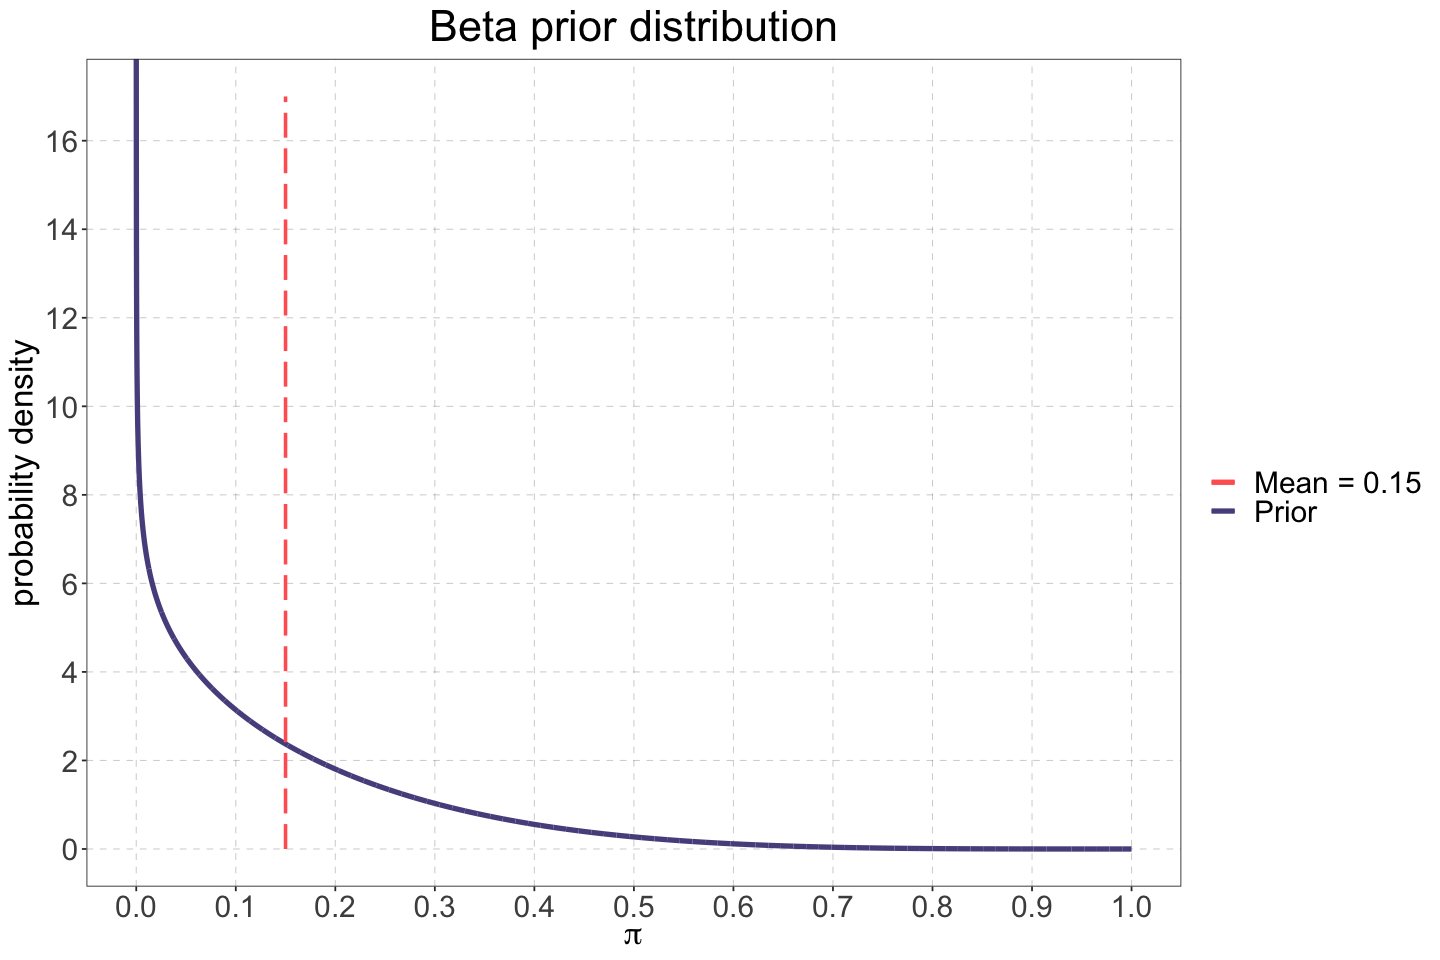

In [33]:
# beta plot

beta_prior_plot <- ggplot() + 
                    geom_line(
                        aes(x = prob, y = beta_prior_distr, color = "Prior"),
                        linewidth = 1.5) + 
                    geom_segment(
                        aes(
                            x = beta_mean, 
                            y = 0, 
                            xend = beta_mean, 
                            yend = 17,
                            color = "Mean = 0.15"), 
                        linetype = "longdash", 
                        linewidth = 1)

beta_prior_plot <- beta_prior_plot +
        theme_bw() +
        theme( legend.position = "right",
        plot.title = element_text(size = 26, hjust = 0.5),
        axis.title = element_text(size = 20),
        axis.text  = element_text(size = 18),
        legend.title = element_text(size = 20, hjust = 0.5),
        legend.text  = element_text(size = 18),
        panel.grid.major.y = element_line( color = alpha("black",0.2),
                                           linewidth = 0.3,
                                           linetype = 2 ),
        panel.grid.major.x = element_line( color = alpha("black",0.2),
                                          linewidth = 0.3,
                                          linetype = 2 ),
        panel.grid.minor = element_blank(),
        panel.background = element_blank(),
        legend.background = element_rect( fill = "white",
                                          linewidth = 0.5, 
                                          linetype = "solid", 
                                          colour = "white" ) ) +
        labs( x = TeX("$\\pi$"), 
              y = "probability density", 
              title = "Beta prior distribution" ) +
        scale_color_manual(name = "", 
                        values = c("Prior" = color_palette[1], "Mean = 0.15" = color_palette[3])) + 
        scale_x_continuous(n.breaks = 15) +
        scale_y_continuous(n.breaks = 10)

beta_prior_plot

The appropriate likelihood is, as said, a Binomial distribution. Then, with a Beta prior, the posterior distribution for $\pi$, the probability of failure, is a Beta distribution with parameters

$$ \alpha =  \alpha_{prior} + y $$

and 

$$ \beta = \beta_{prior}+n-y$$

In [34]:
# beta posterior parameters

alpha_post <- alpha_prior + y_failure
beta_post <- beta_prior + n_blood_disease - y_failure

In [35]:
alpha_post
beta_post

[1] 6.825765

[1] 73.67934

In [36]:
# beta posterior distribution

beta_post_distr <- dbeta(prob, alpha_post, beta_post)

In [37]:
# posterior mean and variance from distribution

beta_post_mean <- integrate(function(x) dbeta(x, alpha_post, beta_post)*x, 0,1)
beta_post_var <- integrate(
                function(x) dbeta(x, alpha_post, beta_post)*(x-beta_post_mean$value)^2, 0, 1
                )

cat(glue("The mean and variance of the posterior distribution are respectively {round(beta_post_mean$value,3)} and {round(beta_post_var$value, 5)}."))

The mean and variance of the posterior distribution are respectively 0.085 and 0.00095.

In [38]:
# posterior mean and variance from theory

beta_post_mean_th <- alpha_post/(alpha_post+beta_post)
beta_post_var_th <- alpha_post*beta_post/((alpha_post+beta_post)^2 * (alpha_post+beta_post+1))

cat(glue("The mean and variance of the posterior distribution calculated from theory are respectively {round(beta_post_mean_th,3)} and {round(beta_post_var_th, 5)}."))

The mean and variance of the posterior distribution calculated from theory are respectively 0.085 and 0.00095.

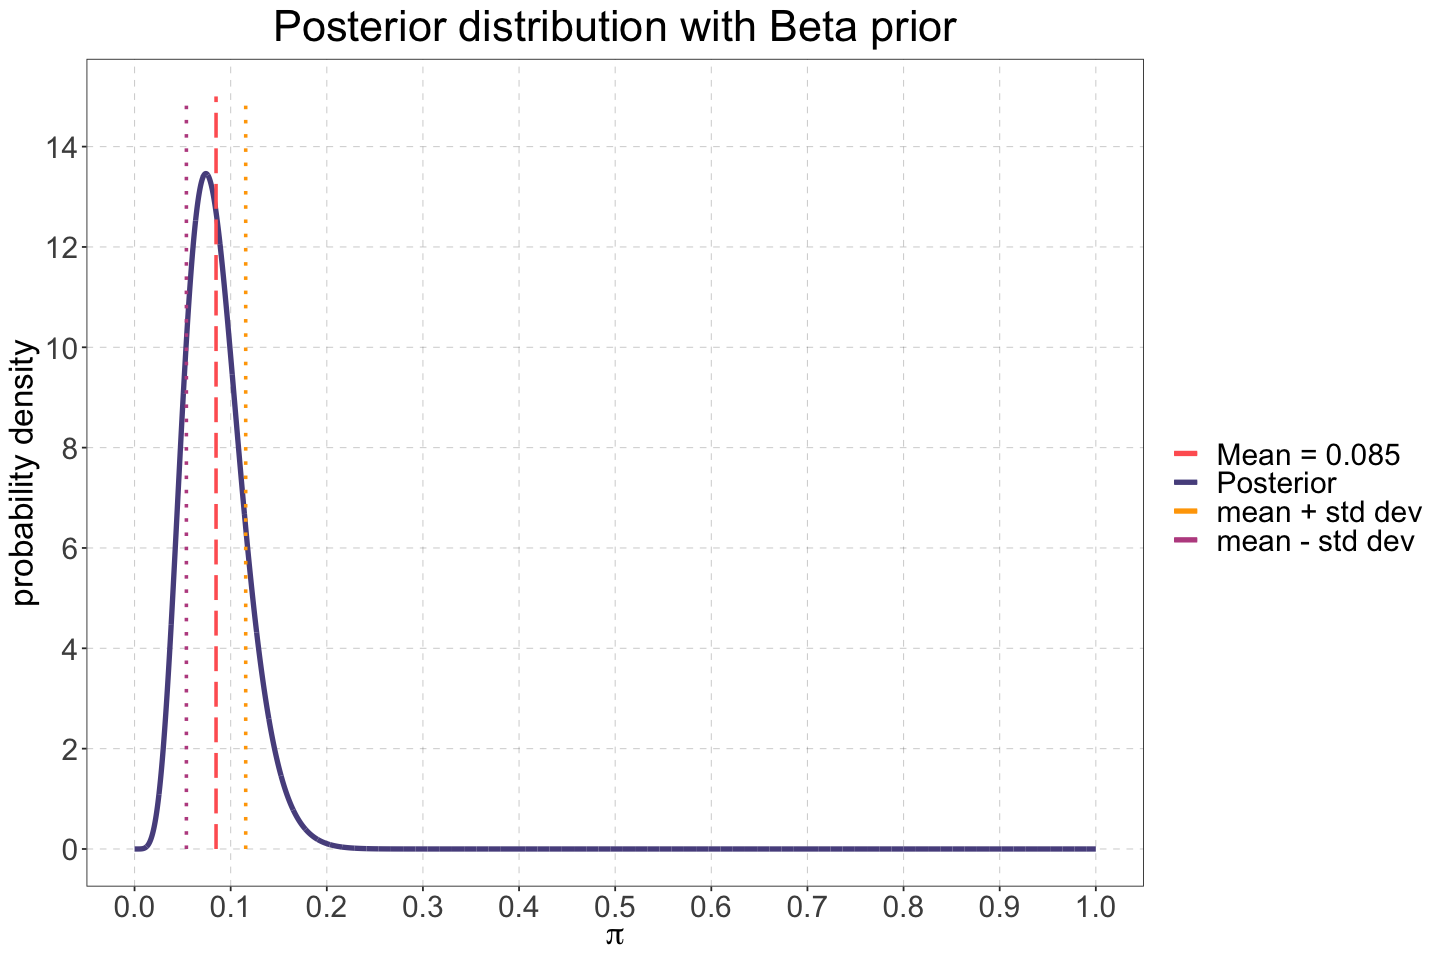

In [39]:
# posterior plot

plot_beta_post <- ggplot() + 
                    geom_line(
                        aes(x = prob, y = beta_post_distr, color = "Posterior"),
                        linewidth = 1.5
                        ) + 
                    geom_segment(
                        aes(
                            x = beta_post_mean$value, 
                            y = 0, 
                            xend = beta_post_mean$value, 
                            yend = 15,
                            color = "Mean = 0.085"), 
                            linetype = "longdash", 
                            linewidth = 1
                            ) + 
                    geom_segment(
                        aes(
                            x = beta_post_mean$value-sqrt(beta_post_var$value), 
                            y = 0, 
                            xend = beta_post_mean$value-sqrt(beta_post_var$value), 
                            yend = 15,
                            color = "mean - std dev"
                            ), 
                        linetype = "dotted", 
                        linewidth = 1) + 
                    geom_segment(
                        aes(
                            x = beta_post_mean$value+sqrt(beta_post_var$value), 
                            y = 0, 
                            xend = beta_post_mean$value+sqrt(beta_post_var$value), 
                            yend = 15,
                            color = "mean + std dev"
                            ), 
                        linetype = "dotted", 
                        linewidth = 1)

plot_beta_post <- plot_beta_post +
        theme_bw() +
        theme( legend.position = "right",
        plot.title = element_text(size = 26, hjust = 0.5),
        axis.title = element_text(size = 20),
        axis.text  = element_text(size = 18),
        legend.title = element_text(size = 20, hjust = 0.5),
        legend.text  = element_text(size = 18),
        panel.grid.major.y = element_line( color = alpha("black",0.2),
                                           linewidth = 0.3,
                                           linetype = 2 ),
        panel.grid.major.x = element_line( color = alpha("black",0.2),
                                          linewidth = 0.3,
                                          linetype = 2 ),
        panel.grid.minor = element_blank(),
        panel.background = element_blank(),
        legend.background = element_rect( fill = "white",
                                          linewidth = 0.5, 
                                          linetype = "solid", 
                                          colour = "white" ) ) +
        labs( x = TeX("$\\pi$"), 
              y = "probability density", 
              title = "Posterior distribution with Beta prior" ) +
        scale_color_manual(name = "", 
                        values = c("Posterior" = color_palette[1], "Mean = 0.085" = color_palette[3], "mean - std dev" = color_palette[2], "mean + std dev" = color_palette[4])) + 
        scale_x_continuous(n.breaks = 15) +
        scale_y_continuous(n.breaks = 10)

plot_beta_post

#### 4. Perform a test of hypothesis assuming that if the probability of failing to the detect the desease in ill patients is greater or equal than $15\%$, the new test is no better than the traditional method. Test the sample at a $5\%$ level of significance in the Bayesian way.

We wish to test the null hypothesis, $H_0$, i.e.,

$$ H_0:\,\,\,\pi \ge \pi_0 = 0.15 $$

corresponding to the fact that the new method is better than the traditional one,

versus the alternative hypothesis $H_1$, i.e., 

$$ H_1:\,\,\,\pi < \pi_0 = 0.15 $$

corrisponding to the fact that the new mehtod is no better than the traditional one.

Our level of significance is $\alpha = 5\%$.

We have to evaluate the posterior probability of the null hypothesis, and integrate over the required region:

$$ P(H_0|D) = \int_{\pi_0}^{1} P(\pi|D) d\pi $$

Then, we reject the null hypothesis if $P(H_0|D) < \alpha$.

So, we have to integrate the posterior probability, computed in the previous step, and see if the value we obtain is greater than our significance level or not.

In [40]:
# our threshold
pi0 <- 0.15

# integrating
prob_H0 <- integrate(function(x) dbeta(x, alpha_post, beta_post), pi0, 1)

prob_H0

0.03127933 with absolute error < 8.2e-07

Then, we reject the null hypothesis $H_0$ since the value we obtained is smaller than our level of significance $\alpha = 0.05$. So, we can conclude that the new method is more efficient than the traditional one.

In [41]:
alpha_tail <- qbeta(0.05, alpha_post, beta_post, lower.tail = FALSE)
alpha_tail

[1] 0.140787

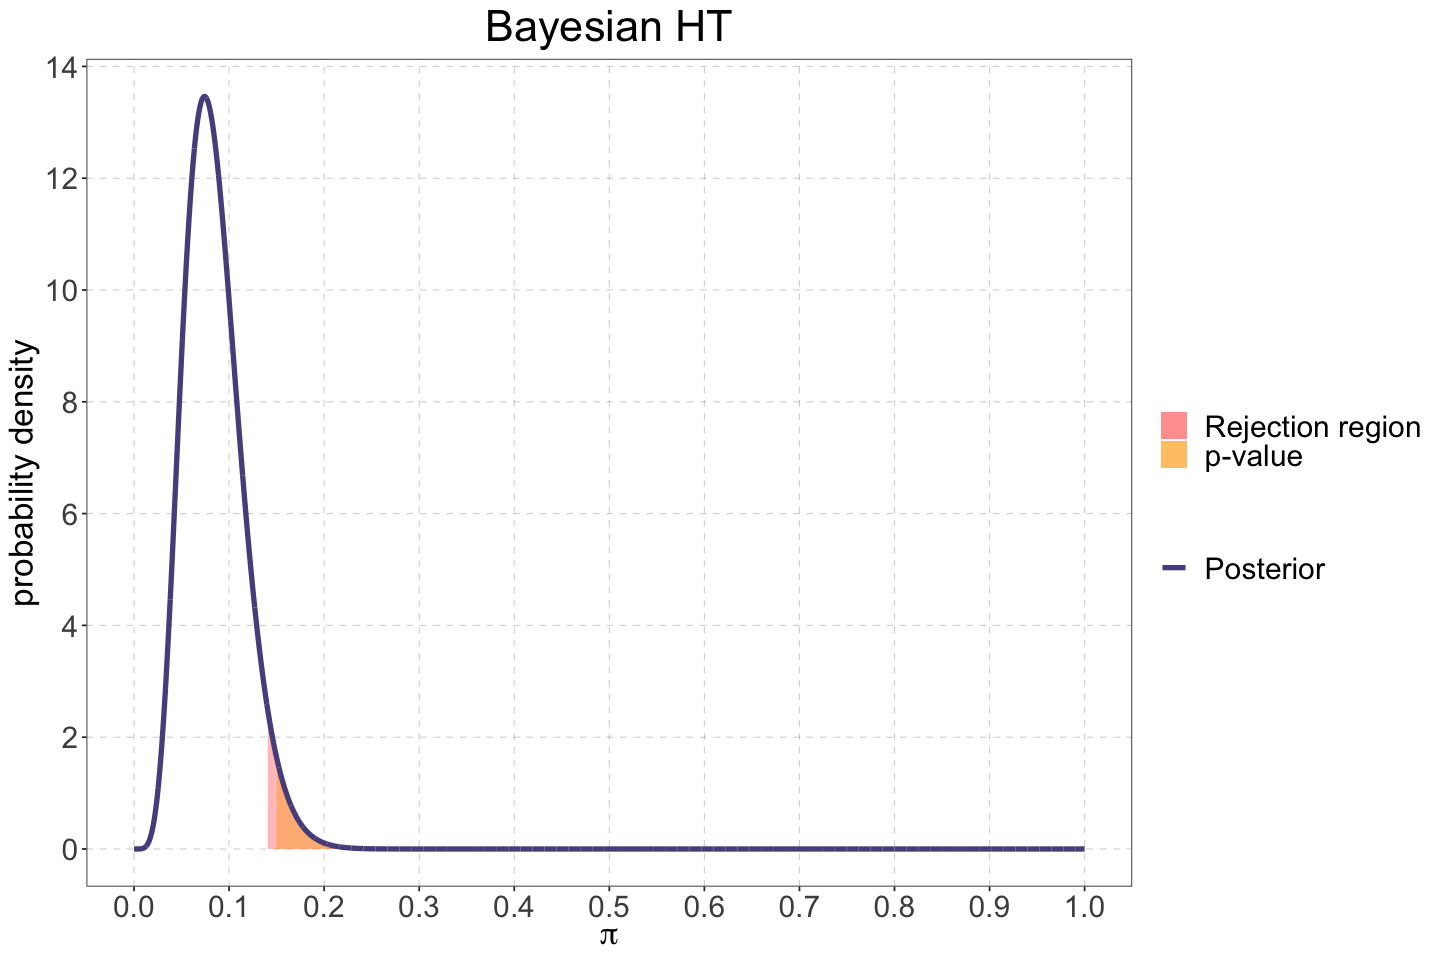

In [42]:
# plot

plot4 <- ggplot() +
         geom_area(
            aes(
                x = prob[prob>alpha_tail],
                y = beta_post_distr[prob>alpha_tail],
                fill = "Rejection region"
            ),
            alpha = 0.4
         ) +
         geom_area(
            aes(
                x = prob[prob>0.15],
                y = beta_post_distr[prob>0.15],
                fill = "p-value"
            ),
            alpha = 0.4
         ) +
         geom_line(
            aes(
                x = prob,
                y = beta_post_distr,
                color = "Posterior"
            ),
            linewidth = 1.5
         ) +
        theme_bw() +
        theme( legend.position = "right",
        plot.title = element_text(size = 26, hjust = 0.5),
        axis.title = element_text(size = 20),
        axis.text  = element_text(size = 18),
        legend.title = element_text(size = 20, hjust = 0.5),
        legend.text  = element_text(size = 18),
        panel.grid.major.y = element_line( color = alpha("black",0.2),
                                           linewidth = 0.3,
                                           linetype = 2 ),
        panel.grid.major.x = element_line( color = alpha("black",0.2),
                                          linewidth = 0.3,
                                          linetype = 2 ),
        panel.grid.minor = element_blank(),
        panel.background = element_blank(),
        legend.background = element_rect( fill = "white",
                                          linewidth = 0.5, 
                                          linetype = "solid", 
                                          colour = "white" ) ) +
        labs( x = TeX("$\\pi$"), 
              y = "probability density", 
              title = "Bayesian HT" ) +
        scale_color_manual(name = "", 
                        values = c("Posterior" = color_palette[1])) + 
        scale_fill_manual( name = "",
                           values = c( "p-value" = color_palette[4], "Rejection region" = color_palette[3])) +
        scale_x_continuous(n.breaks = 15) +
        scale_y_continuous(n.breaks = 10)

plot4

Moreover, the p-value lies in the rejection region, so we reject the null hypothesis (p-value < alpha).

#### 5. Perform the same hypothesis test in the classical frequentist way.

Also in this case we have that $H_0$ corresponds to $\pi \ge 0.15$ and $H_1$ to $\pi < 0.15$. 

In [43]:
cases <- seq(0,8, 1)

# null distribution of the test statistic
distr <- dbinom(cases, n_blood_disease, pi0)

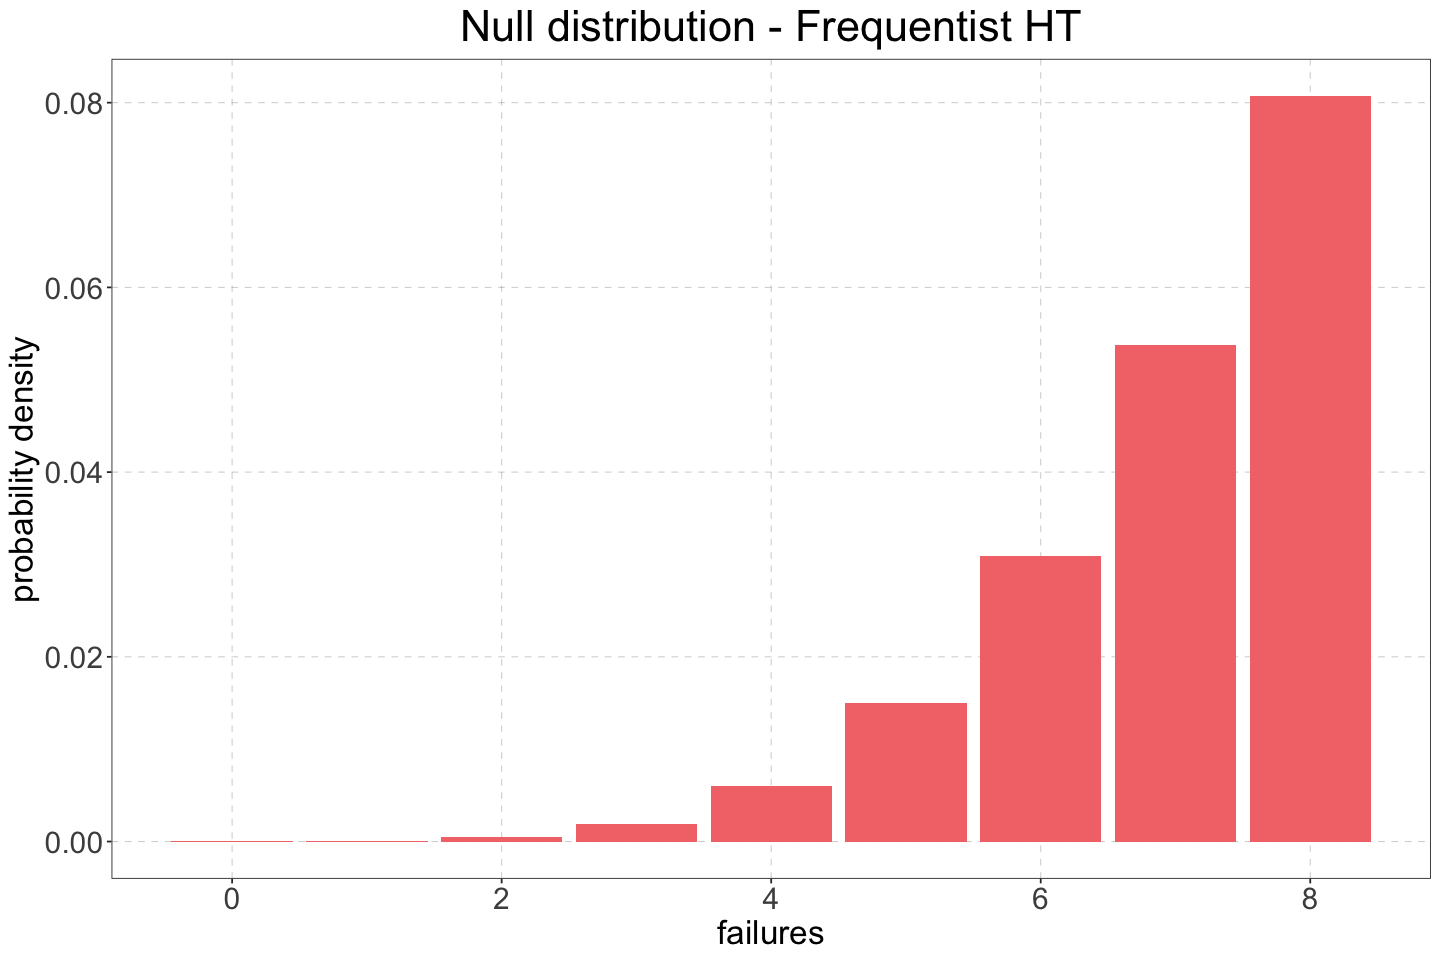

In [44]:
# plot

plothist <- ggplot() + 
            geom_col( aes(x = cases, y = distr), fill = "#f37777" ) +
            theme_bw() +
            theme(
            plot.title = element_text(size = 26, hjust = 0.5),
            axis.title = element_text(size = 20),
            axis.text  = element_text(size = 18),
            panel.grid.major.y = element_line( color = alpha("black",0.2),
                                               linewidth = 0.3,
                                               linetype = 2 ),
            panel.grid.major.x = element_line( color = alpha("black",0.2),
                                              linewidth = 0.3,
                                              linetype = 2 ),
            panel.grid.minor = element_blank(),
            panel.background = element_blank() ) +
            labs( x = "failures", 
                  y = "probability density", 
                  title = "Null distribution - Frequentist HT" )
plothist

In [45]:
pvalue <- pbinom(y_failure, n_blood_disease, pi0)
pvalue

[1] 0.0543533

The p-value is greater than alpha, so we cannot reject the null hypothesis.

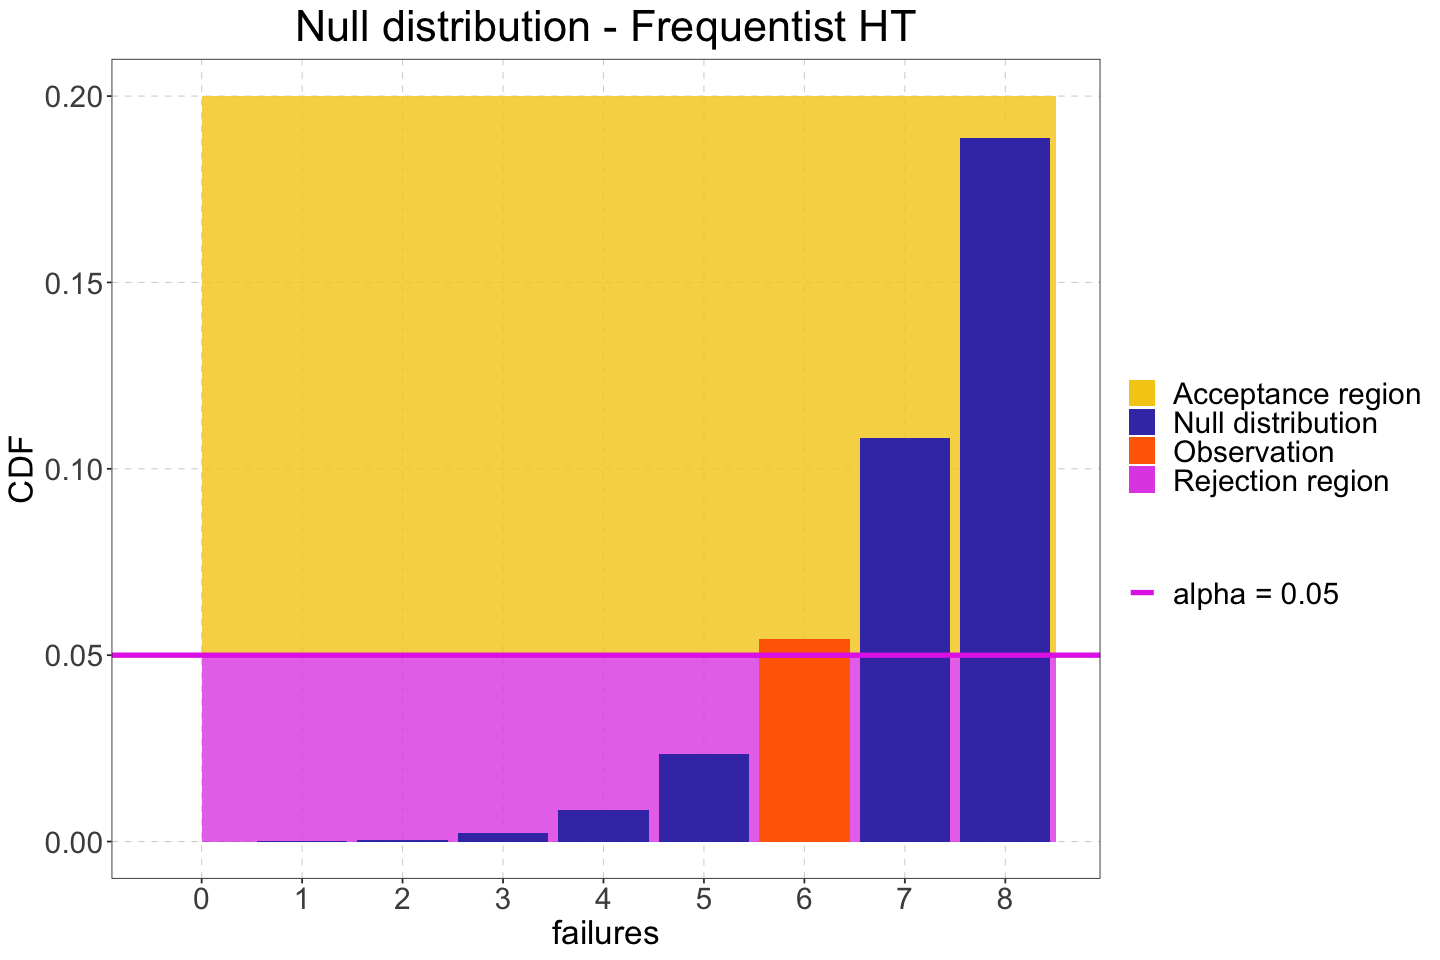

In [46]:
plotc <- ggplot() + 
        geom_rect(
                aes(
                        xmin = 0,
                        xmax = 8.5,
                        ymin = 0,
                        ymax = 0.05,
                        fill = "Rejection region"
                    ),
                    alpha = 0.8
                ) +
        geom_rect(
                aes(
                        xmin = 0,
                        xmax = 8.5,
                        ymin = 0.05,
                        ymax = 0.2,
                        fill = "Acceptance region"
                    ),
                    alpha = 0.8
                ) +
        geom_col(aes(x = cases, y = pbinom(cases, n_blood_disease, pi0), fill = "Null distribution")) + 
        geom_col(aes(x = 6, y = pbinom(6, n_blood_disease, pi0), fill = "Observation")) +
        geom_hline( aes(yintercept = 0.05, color = "alpha = 0.05"), linewidth = 1.5) +
        theme_bw() +
        theme( legend.position = "right",
        plot.title = element_text(size = 26, hjust = 0.5),
        axis.title = element_text(size = 20),
        axis.text  = element_text(size = 18),
        legend.title = element_text(size = 20, hjust = 0.5),
        legend.text  = element_text(size = 18),
        panel.grid.major.y = element_line( color = alpha("black",0.2),
                                           linewidth = 0.3,
                                           linetype = 2 ),
        panel.grid.major.x = element_line( color = alpha("black",0.2),
                                          linewidth = 0.3,
                                          linetype = 2 ),
        panel.grid.minor = element_blank(),
        panel.background = element_blank(),
        legend.background = element_rect( fill = "white",
                                          linewidth = 0.5, 
                                          linetype = "solid", 
                                          colour = "white" ) ) +
        scale_fill_manual(name = "", values = c("Observation" = "#ff6a00", "Null distribution" = "#413bb4", "Rejection region" = "#e256e7", "Acceptance region" = "#f5cc18")) +
        scale_color_manual(name = "", values = c("alpha = 0.05" = "#e33de9")) +
        scale_x_continuous(n.breaks = 9) +
        scale_y_continuous(n.breaks = 5) +
        labs( x = "failures", 
              y = "CDF", 
              title = "Null distribution - Frequentist HT" )
 
plotc

We cannot reject $H_0$ since our observation lies in the acceptance region.

----------------------------------------------------------------------------------------

# Exercise 3: the lighthouse

A lighthouse is loceted at a position $\alpha$ along the shore and at a distance $\beta$ out at sea. It emits a series of short highly collimated flashes at random intervals at random angles. We detect the pulses on the coast using photodetectors: they record only the position $x_k$ of the flash arrival on the coast, not the angle of emission $\theta_k$. $N$ flashes have been recorded at position $\{x_k\}$ and we want to estimate the position of the lighthouse.

It looks reasonable to assign a uniform likelihood PDF on the angle of emission $\theta_k$:

$$ P(\theta_k|\alpha,\beta) = \frac{1}{\pi} $$

with 

$$-\frac{\pi}{2} \le \theta \le \frac{\pi}{2}$$

and 

$$x_k-\alpha = \beta \tan (\theta_k)$$

Operating a change of variable, we get the uniform likelihood for $\theta_k$ in function of the position on the shore $x_k$:

$$ P(x|\alpha,\beta) = \frac{1}{\pi}\frac{\beta}{\beta^2+(x-\alpha)^2} $$

and we have obtained a **Cauchy distribution**, which is symmetric about the maximum $\alpha$.

Then, the **likelihood** function is the product of the probabilities for $N$ individual detections:

$$ P(D|\alpha, \beta) = \prod_{j = 1}^N P(x_j|\alpha, \beta) = \prod_{j = 1}^N \left( \frac{1}{\pi}\frac{\beta}{\beta^2+(x_j-\alpha)^2} \right)$$

We choose a flat **prior** for $\alpha$ and $\beta$, $P(\alpha,\beta)$, assuming $\alpha$ and $\beta $ are independent.

Finally, the **posterior** is equal to the likelihood and we better take its natural logarithm, defining

$$ L = \ln(P(\alpha, \beta | D)) = N\left[\ln(\beta)  - \ln(\pi)\right] - \sum_{j=1}^N \ln\left[ \beta^2 + (x_j-\alpha)^2 \right]$$

We want to study the case in which both the position along the shore $\alpha$ and the distance out at sea $\beta$ are unknown.

![](lighthouse.png)

First, we simulate the angles of emission from a uniform distribution.

In [47]:
n_flashes <- 100

# assuming both alpha and beta equal to 1
alpha_true <- 1
beta_true <- 1

In [48]:
# sampling angle values
# we add 0.01 and we subtract it to avoid divergence for the positions x
angles <- runif(n_flashes, -pi/2+0.01, pi/2-0.01)

# getting positions x
positions <- beta_true * tan(angles) + alpha_true

Warning message:
“Removed 4 rows containing non-finite values (`stat_bin()`).”


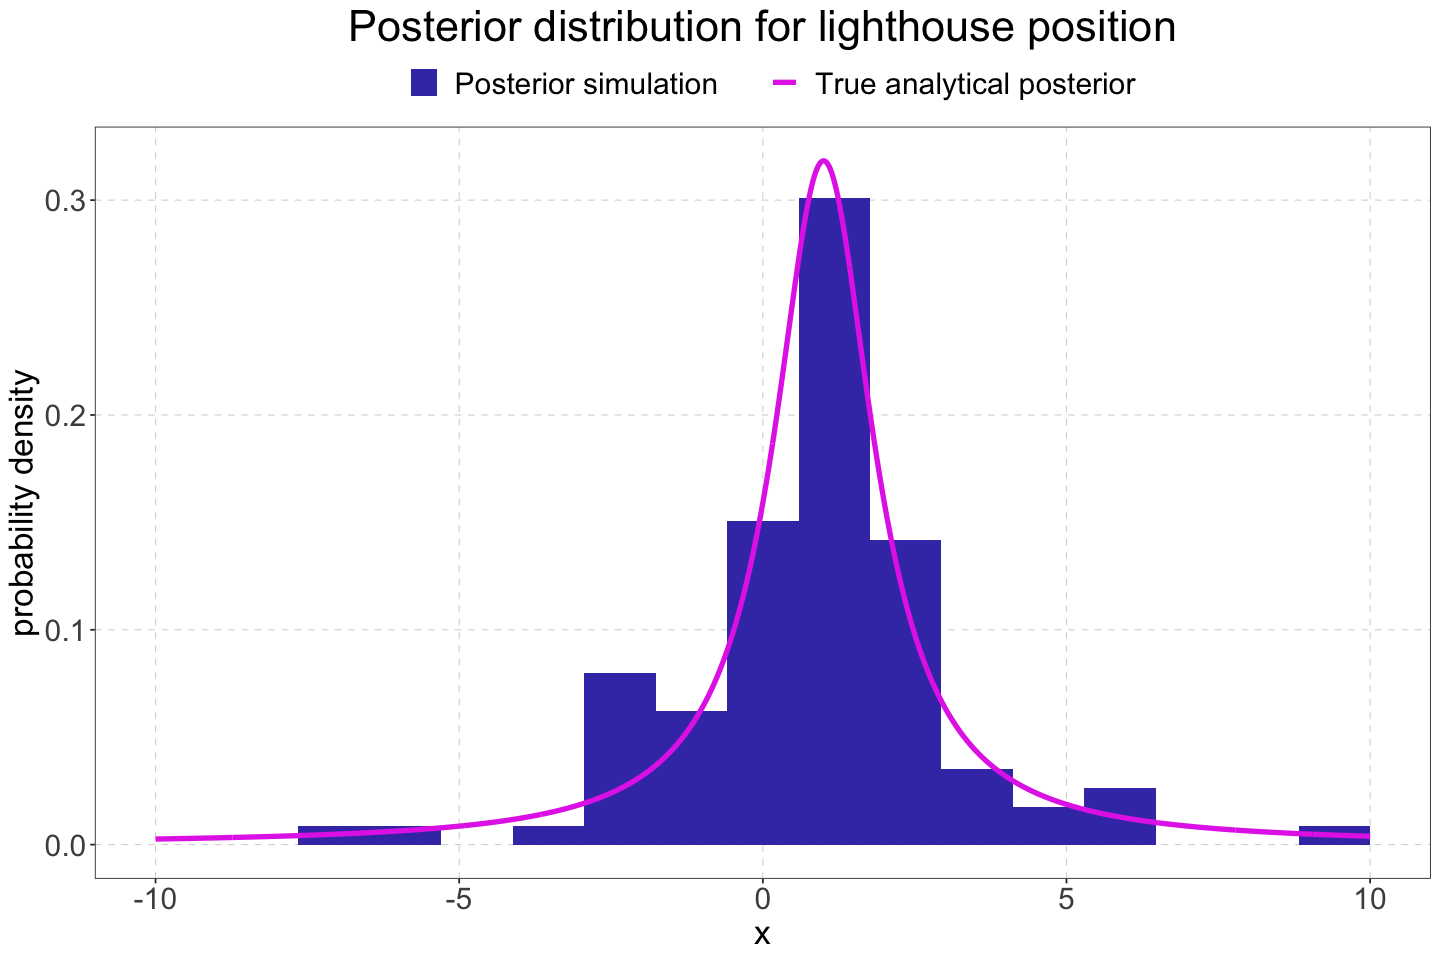

In [49]:
# simulation histogram

histoplot <- ggplot() + 
             geom_histogram(
                aes(
                    x = positions, 
                    y = after_stat(density),
                    fill = "Posterior simulation"
                    ), 
                bins = 18
             ) + 
             geom_line(
                aes(
                    x = seq(-10, 10, 0.01), 
                    y = dcauchy( seq(-10, 10, 0.01), 1, 1),
                    color = "True analytical posterior"
                    ), 
                linewidth = 1.5) +
             theme_bw() +
             theme( legend.position = "top",
             plot.title = element_text(size = 26, hjust = 0.5),
             axis.title = element_text(size = 20),
             axis.text  = element_text(size = 18),
             legend.title = element_text(size = 20, hjust = 0.5),
             legend.text  = element_text(size = 18),
             panel.grid.major.y = element_line( color = alpha("black",0.2),
                                                linewidth = 0.3,
                                                linetype = 2 ),
             panel.grid.major.x = element_line( color = alpha("black",0.2),
                                               linewidth = 0.3,
                                               linetype = 2 ),
             panel.grid.minor = element_blank(),
             panel.background = element_blank(),
             legend.background = element_rect( fill = "white",
                                               linewidth = 0.5, 
                                               linetype = "solid", 
                                               colour = "white" ) ) +
             scale_fill_manual(name = "", values = c("Posterior simulation" = "#413bb4")) +
             scale_color_manual(name = "", values = c("True analytical posterior" = "#e33de9")) +
             xlim(-10,10) +
             scale_y_continuous(n.breaks = 5) +
             labs( x = "x", 
                   y = "probability density", 
                   title = "Posterior distribution for lighthouse position" )

histoplot

In [50]:
# values for alpha and beta
alphas <- seq(-2, 4, by = 6/100)
betas <- seq(0.5, 3, by = 2.5/100)

# posterior matrix (to be filled)
post_matrix <- matrix(0, nrow = length(alphas), ncol = length(betas))

# priors
prior_alpha <- 1
prior_beta <- 1

# log priors
log_prior_alpha <- log(prior_alpha)
log_prior_beta <- log(prior_beta)

# log likelihood and posterior
for (i in 1:length(alphas)) {
    for (j in 1:length(betas)) {
        log_lkl <- sum(log(dcauchy(positions, alphas[i], betas[j])))
        log_post <- log_lkl + log_prior_alpha + log_prior_beta
        post_matrix[i,j] <- exp(log_post)
    }
}

In [51]:
# adjusting matrix
postmatrixplot <- expand.grid(alphas, betas)
postmatrixplot <- cbind( postmatrixplot, c(post_matrix) )
colnames(postmatrixplot) <- c("alpha", "beta", "posterior")

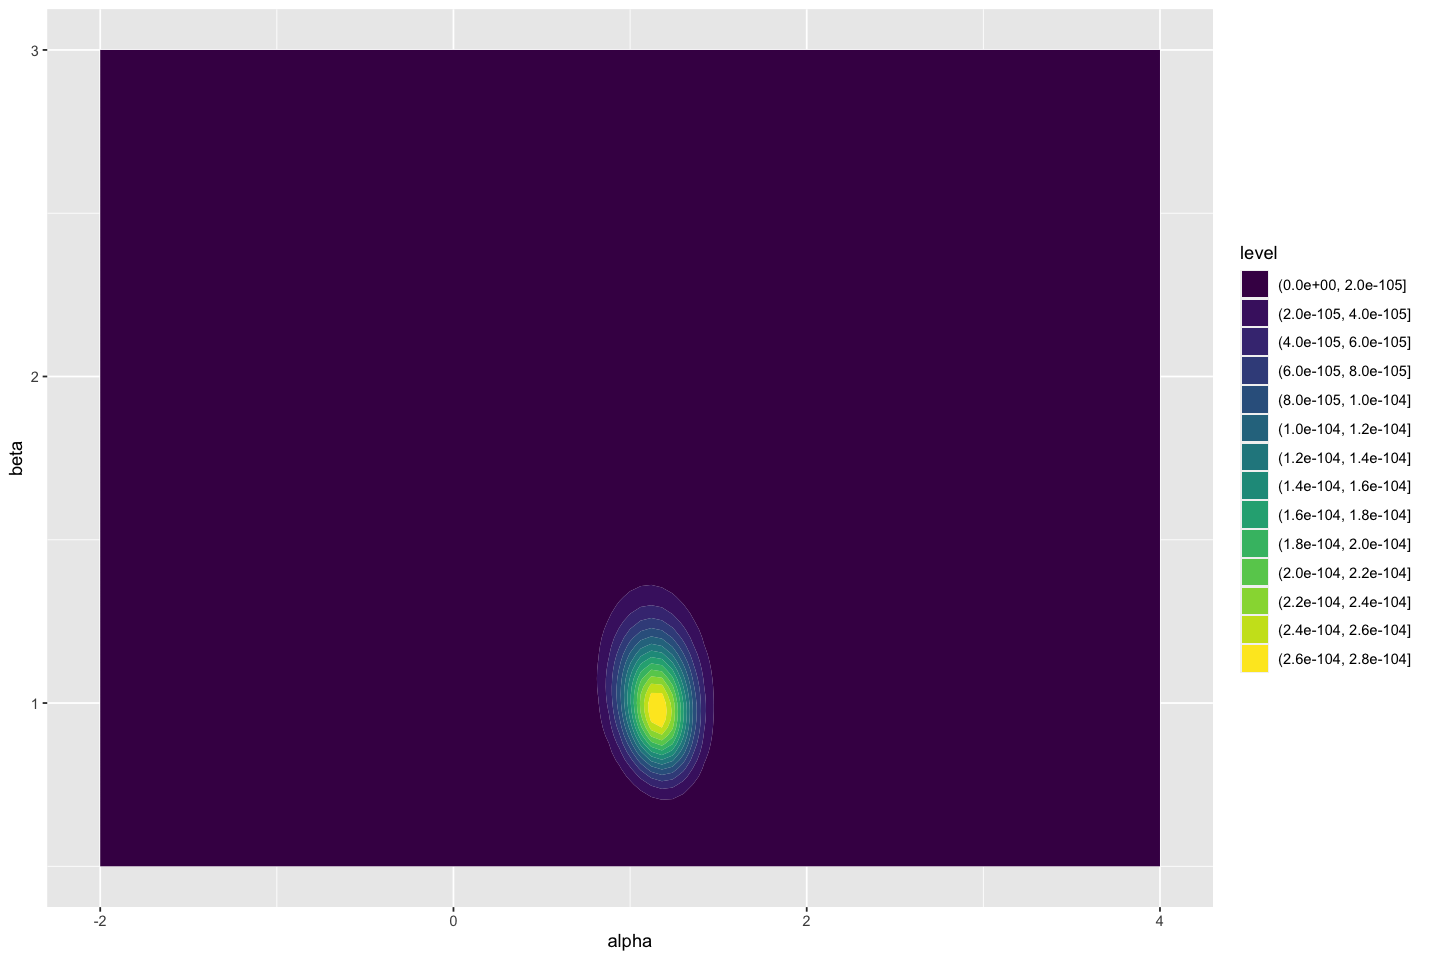

In [52]:
# posterior plot 2D

postplot <- ggplot(postmatrixplot) + geom_contour_filled(aes(x = alpha, y = beta, z = posterior))
postplot

In [53]:
# marginalization

----------------------------------------------------------------------------------

# Exercise 4: Signal over Background

We want the best estimate of the amplitude of the signal peak and of the background. We measure the number of photons in bins of wavelenght or energy: it is proportional to the exposure (time of measurement) and to both signal and background amplitudes through the expression

$$ S_k = \Delta t \left[ A \exp \left( - \frac{(x_k - x_0)^2}{2w^2} \right) + B \right]$$

Where

* $\Delta t$ is the exposure time
* $x_0$ is the centre of the signal peak
* $w$ is the width or resolution of the signal peak
* $A$ is the peak amplitude
* $B$ is the background amplitude

We notice that the number of **expected** photons $S_k$ corresponding to $x_k$ is not generally an integer. The number of **observed** photons $N$ is an integer number and follows the Poisson distribution:

$$ P(N|S) = \frac{S^Ne^{-S}}{N!} $$

where $S$ is the signal and this expression gives us the **likelihood** of the data $D = \left\{ N_j \right\} $ :

$$ P(D|A, B, M) = \prod_j \frac{S_j^{N_j}e^{-S_j}}{N_j!}$$

The model M has $5$ parameters, but we assume that $x_0, w$ and $\Delta t$ are known. We want to infer $P(A, B|D,M)$ from the data.

We assume a minimalistic **prior**: $A$ and $B$ cannot be negative. Then, $P(A,B|M)$ is constant when both $A$ and $B$ are positive, and zero otherwise.

The **posterior** is

$$ P(A,B|D,M) = \frac{1}{Z} \prod_j \frac{S_j^{N_j}e^{-S_j}}{N_j!}  $$

and the log-posterior

$$ L = \log P(A,B|D,M) = C + \sum_j (N_j\log S_j - S_j) $$

where $Z$ is a normalization factor and $C$ is a constant term that includes everything that does not depend on $A,B$.

#### 1. Vary the sampling resolution used to generate the data, keeping the same sampling range:

a. change the resolution $w = \{0.1, \, 0.25, \, 1, \, 2, \, 3\} $

b. check the effect on the results

We generate the data changing the resolution, then we compute the posterior distribution.

In [54]:
# generative model
signal <- function(x, a, b, x0, w, t) {
    t * (a * exp(-(x-x0)^2/(2*w^2)) + b)
}

In [55]:
# model parameters
x0 <- 0
w_list <- c(0.1, 0.25, 1, 2, 3)
A_true <- 2
B_true <- 1
dt <- 5

In [56]:
# sampling grid for compunting posterior

alim <- c(0, A_true + 2)
blim <- c(0.5, 1.5)
N_sample <- 100
uniGrid <- seq(1/(2*N_sample), 1-1/(2*N_sample), by = 1/N_sample)
delta_a <- diff(alim)/N_sample
delta_b <- diff(blim)/N_sample

a <- alim[1] + diff(alim) * uniGrid
b <- blim[1] + diff(blim) * uniGrid

In [57]:
# log posterior
logpost <- function(d, x, a, b, x0, w, t) {
    if(a < 0 || b < 0) {return(-Inf)}
    sum(dpois(d, lambda = signal(x, a, b, x0, w, t), log = TRUE))
}

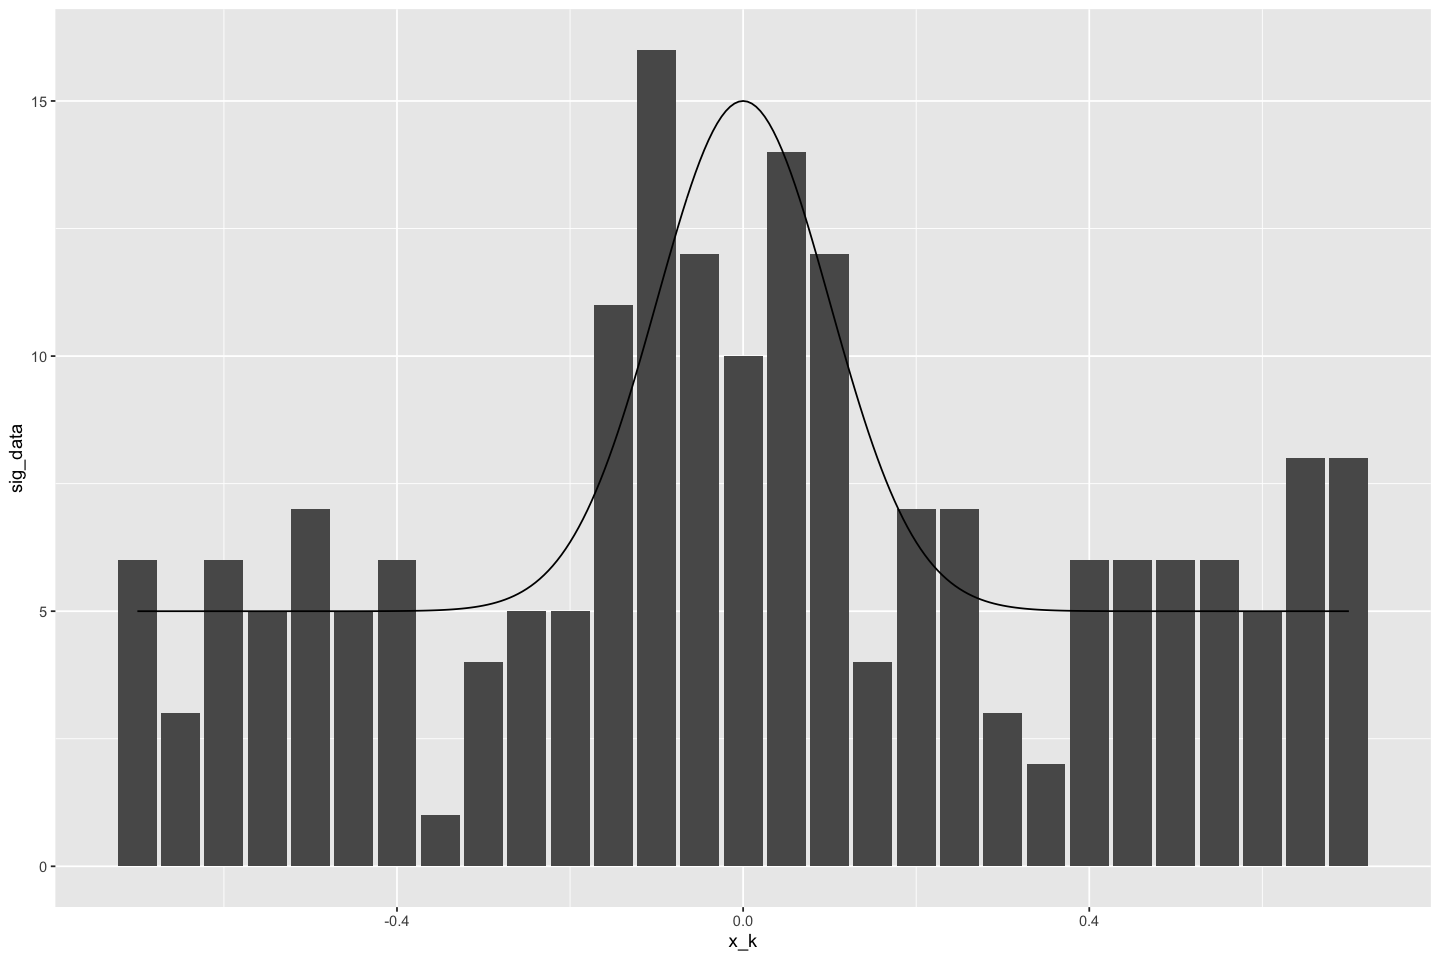

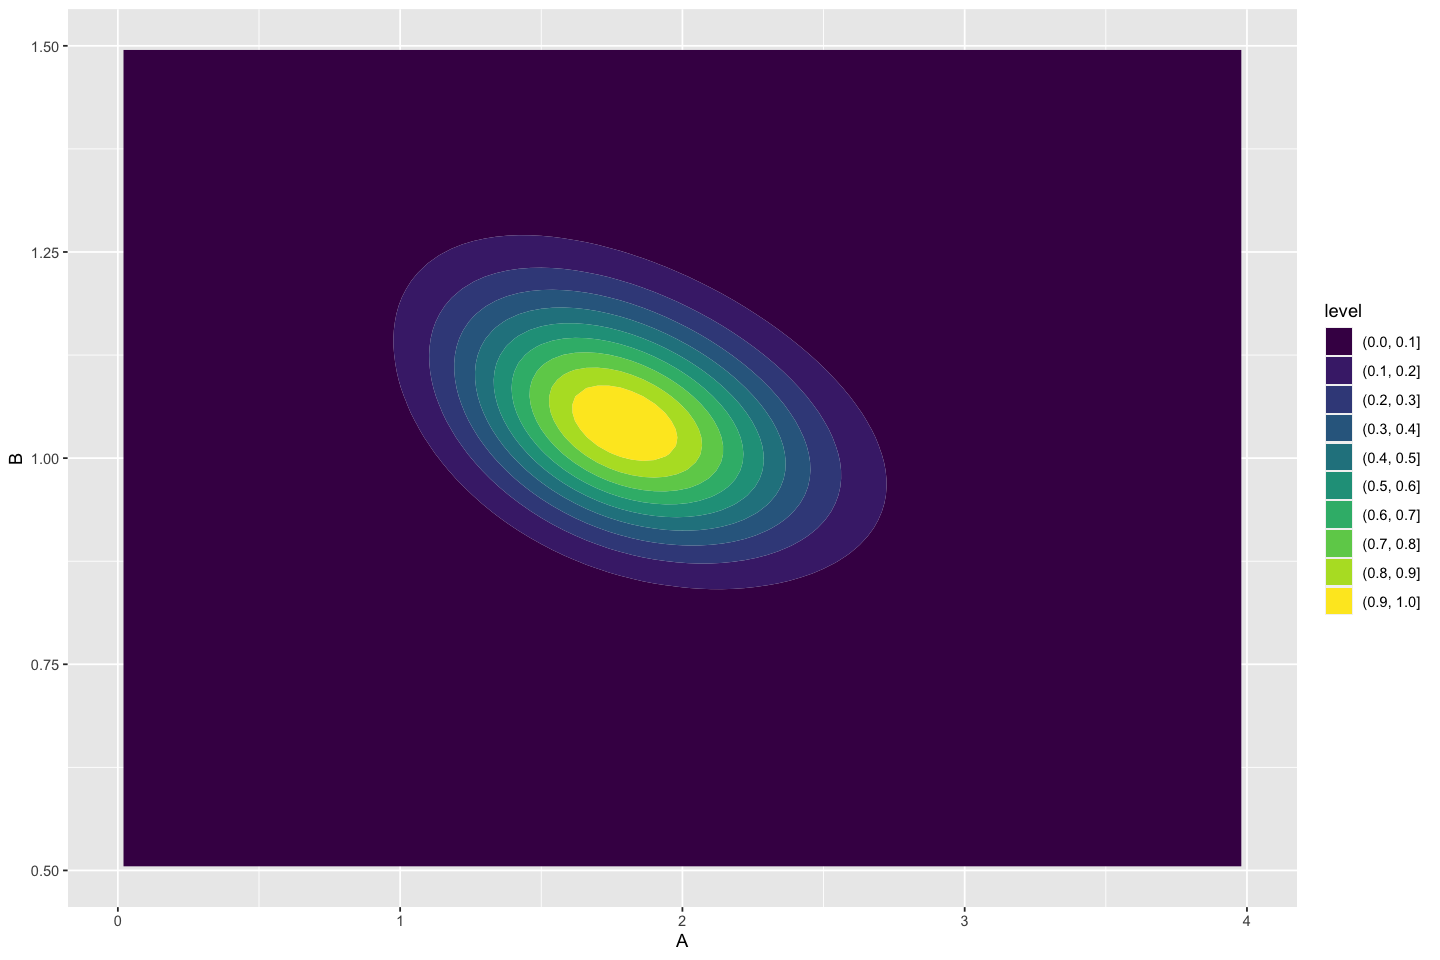

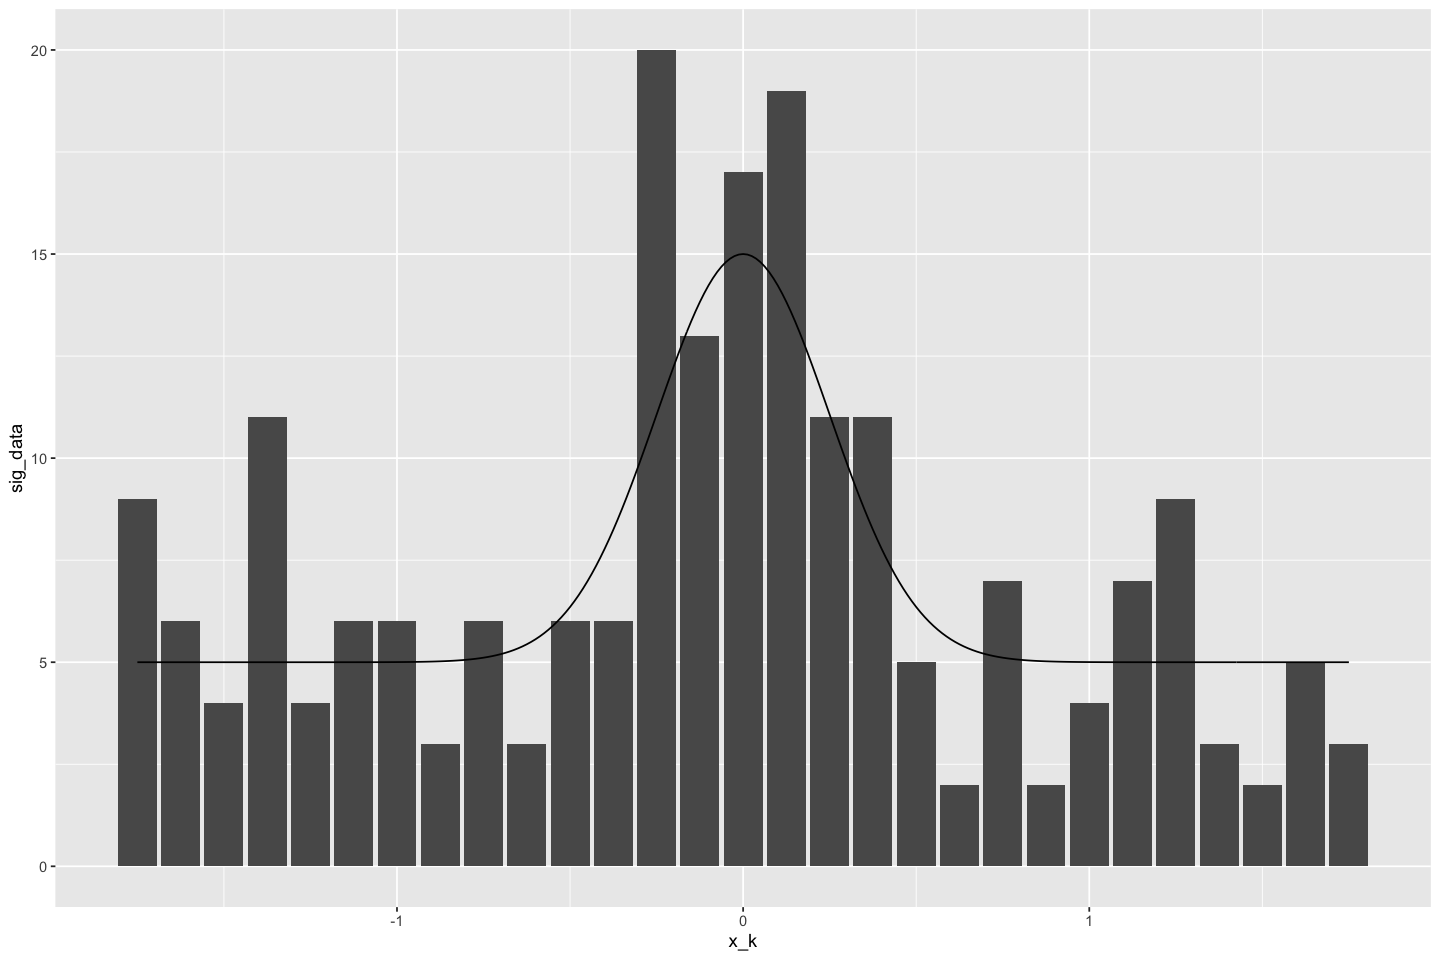

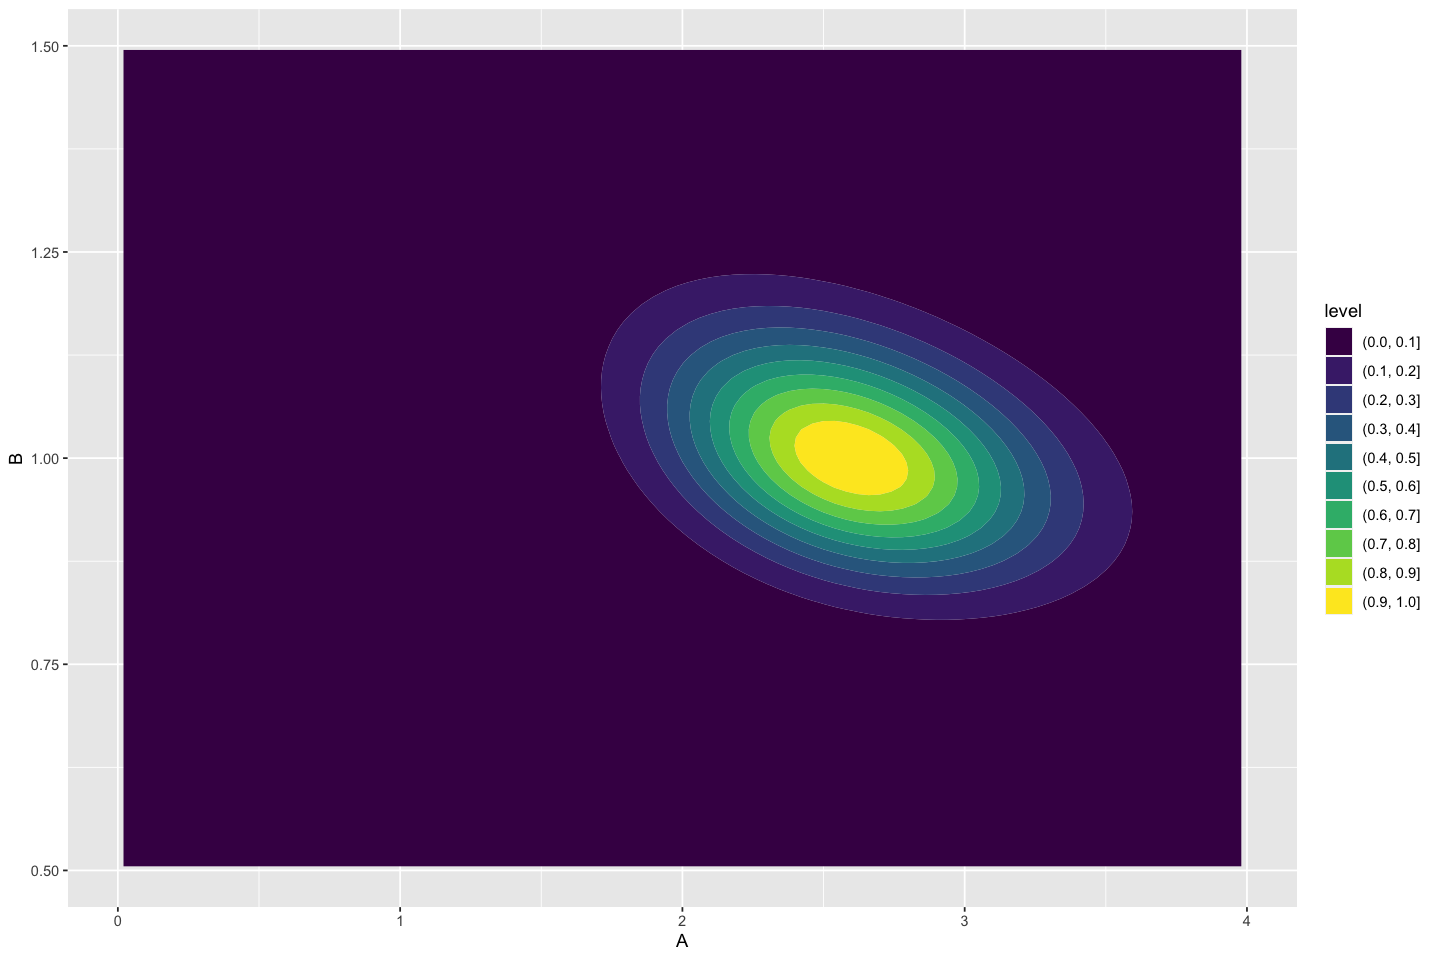

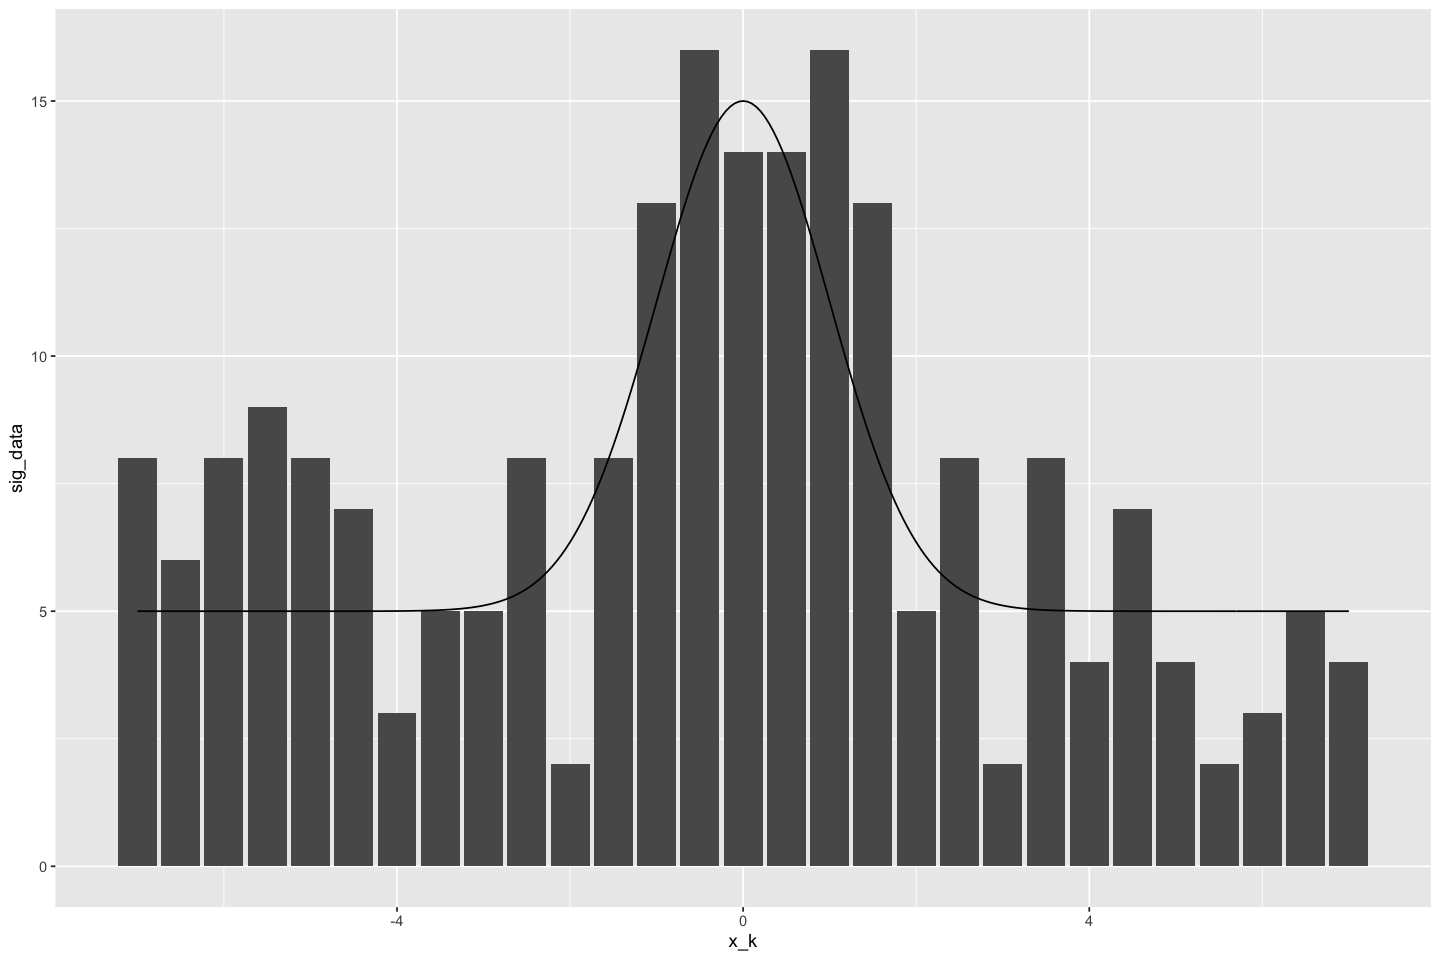

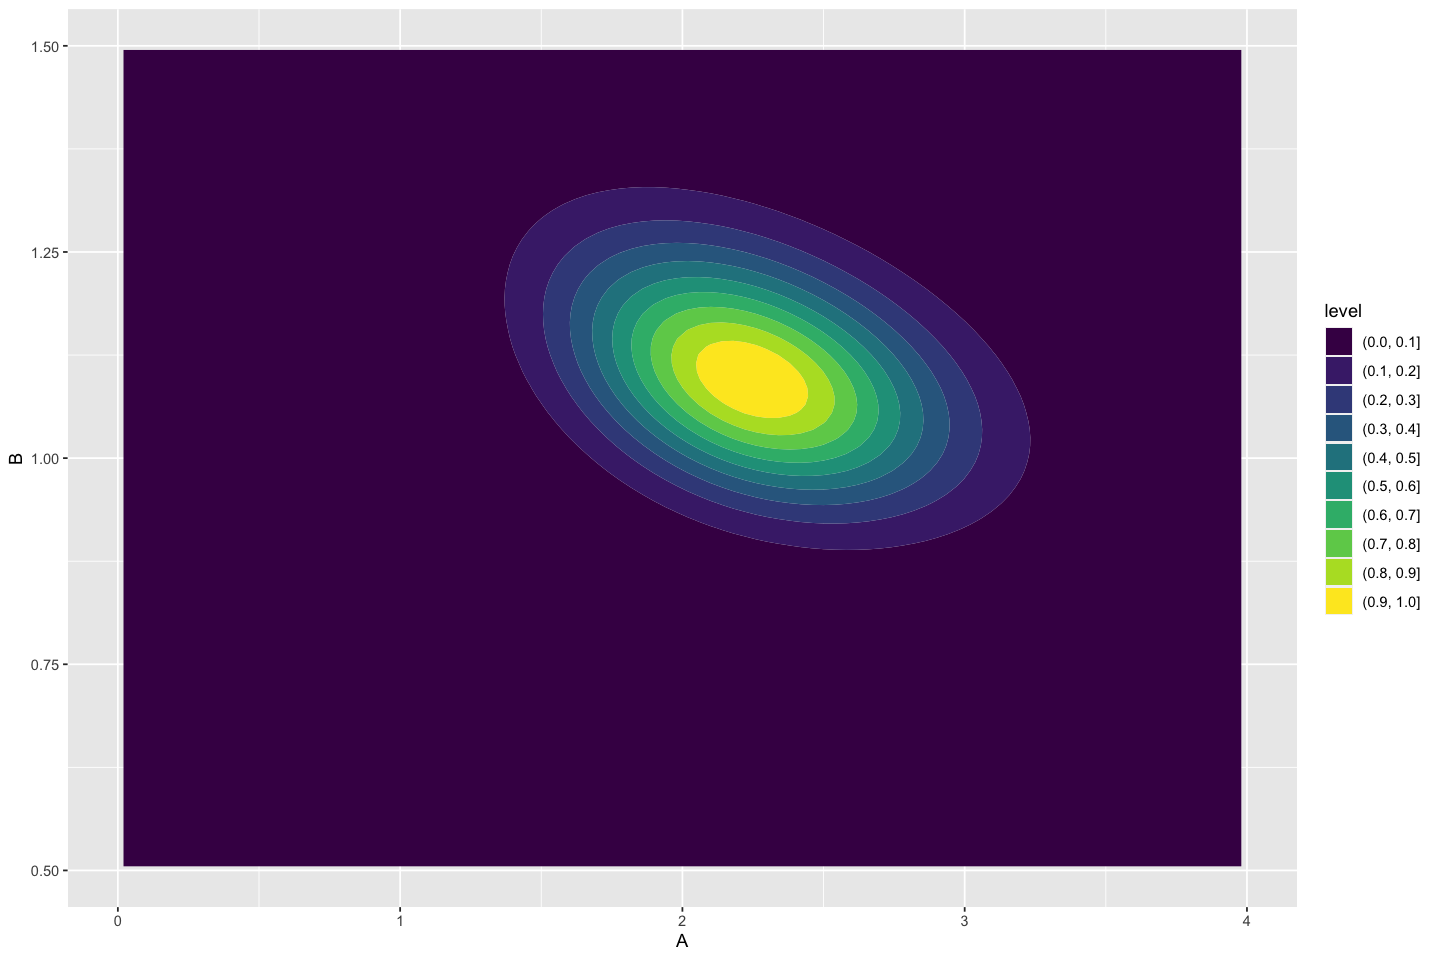

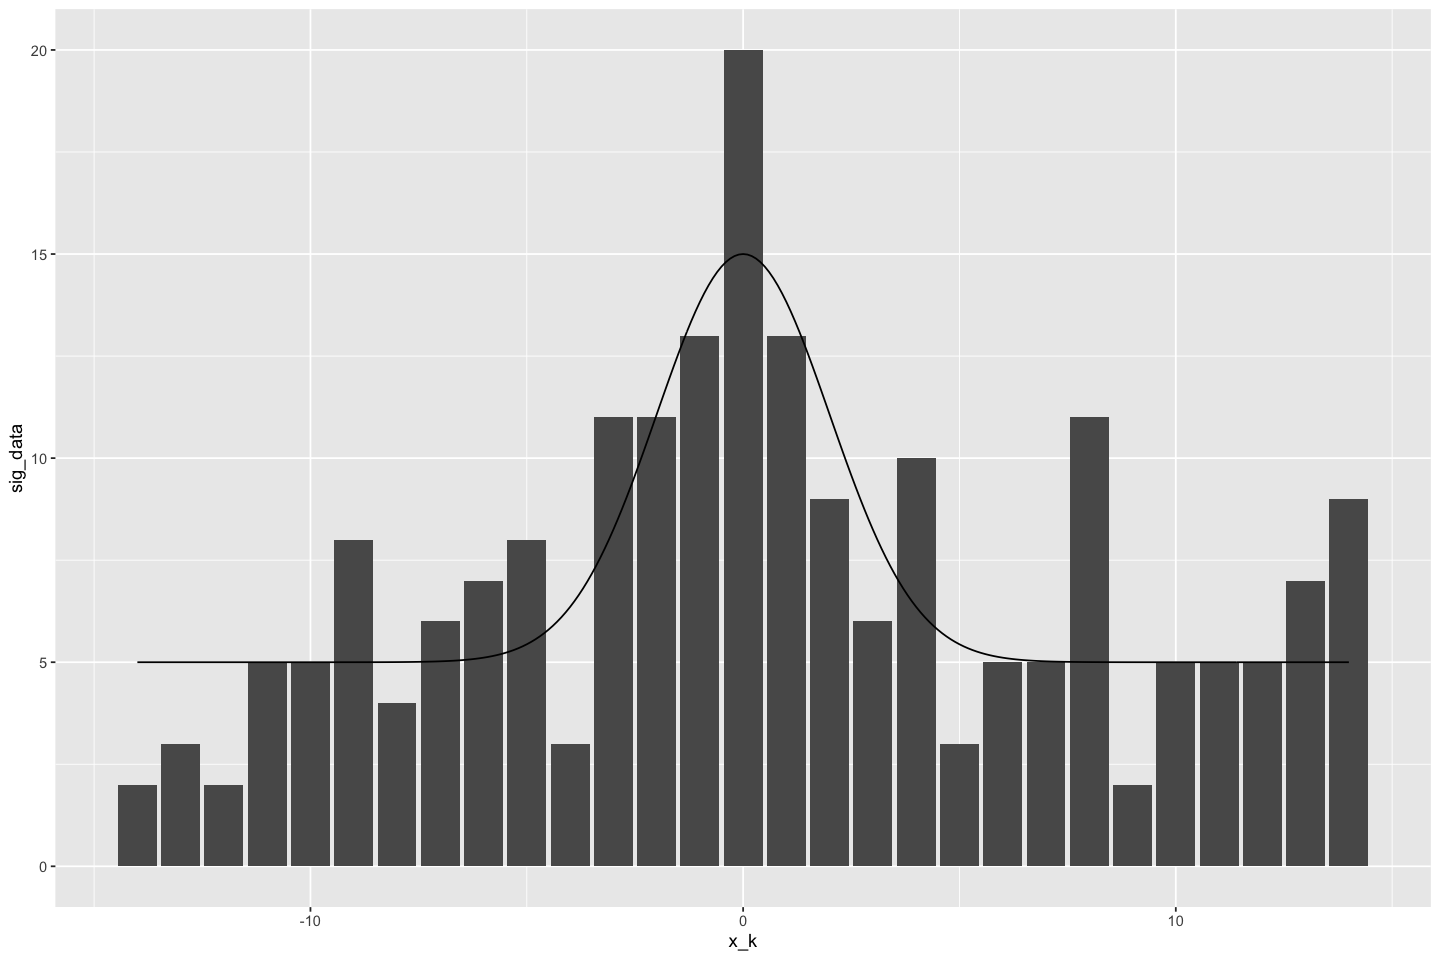

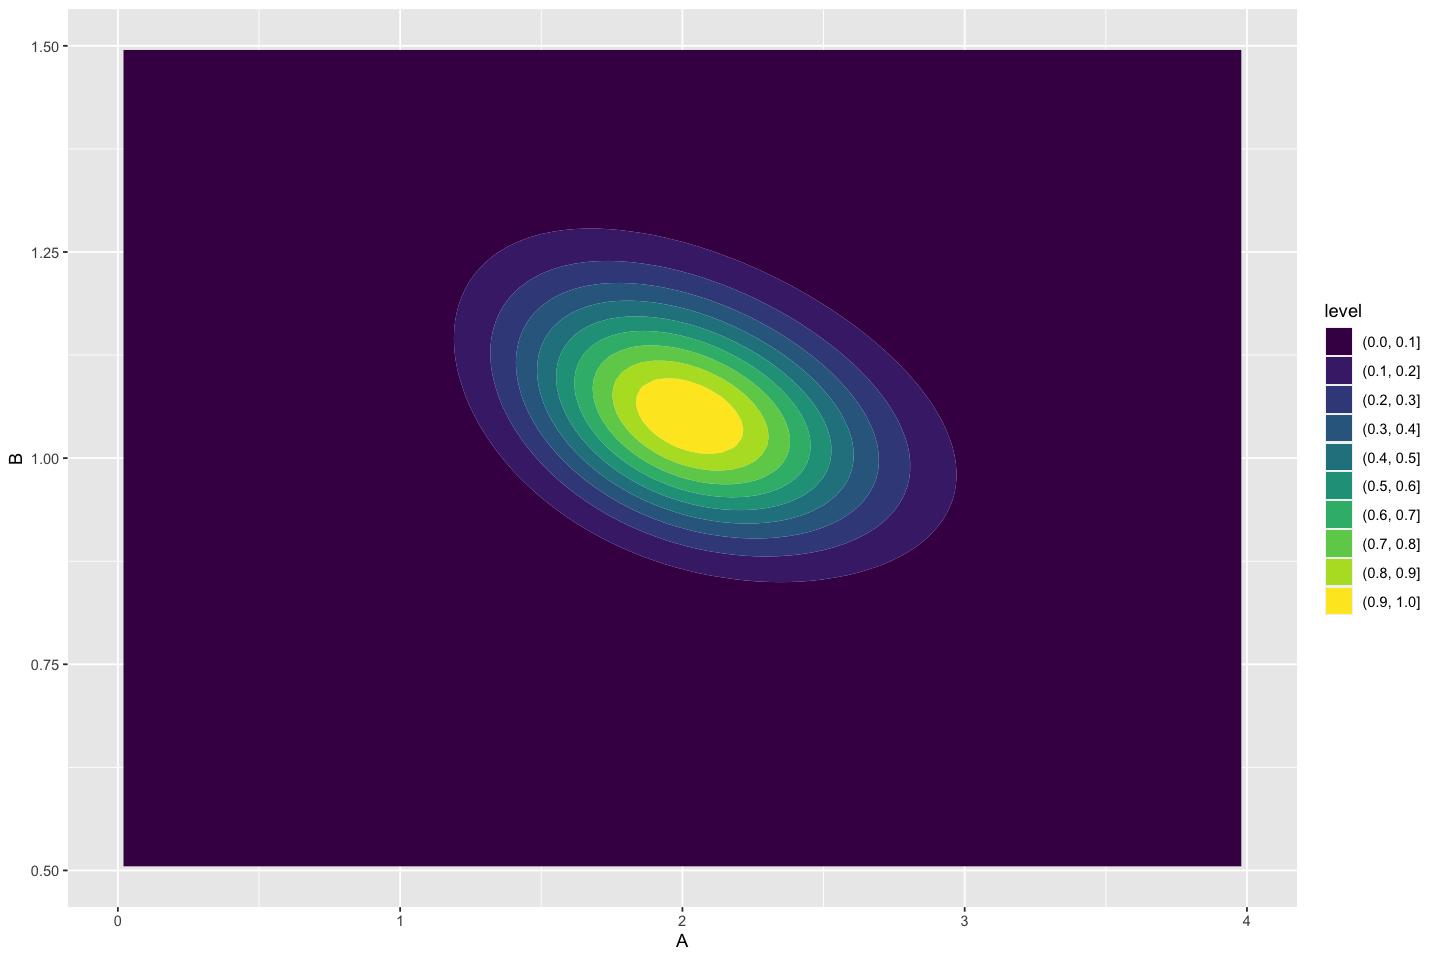

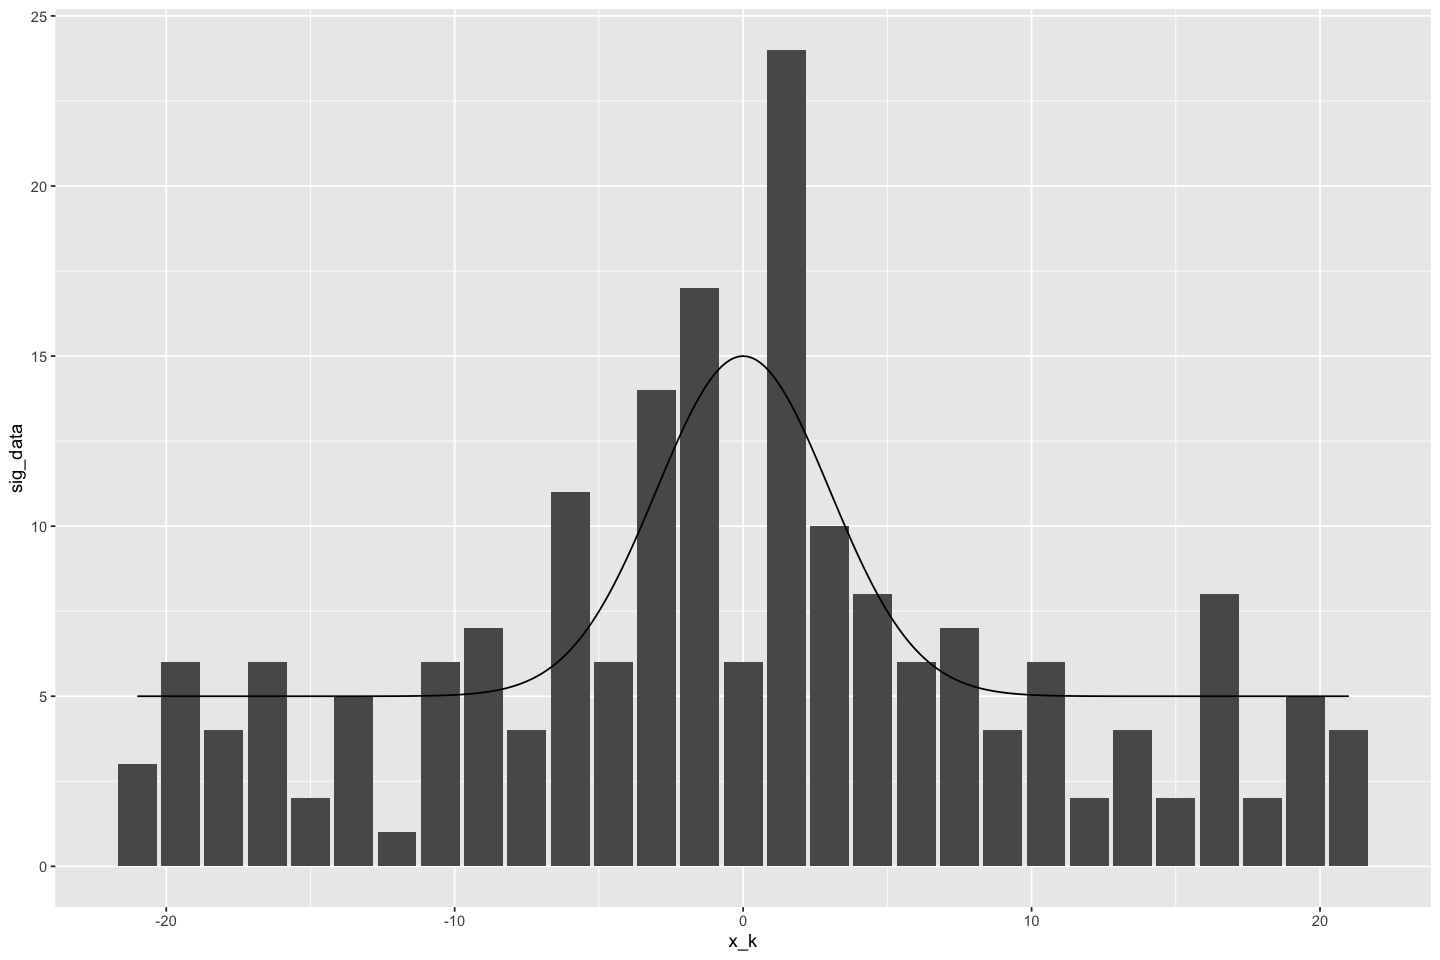

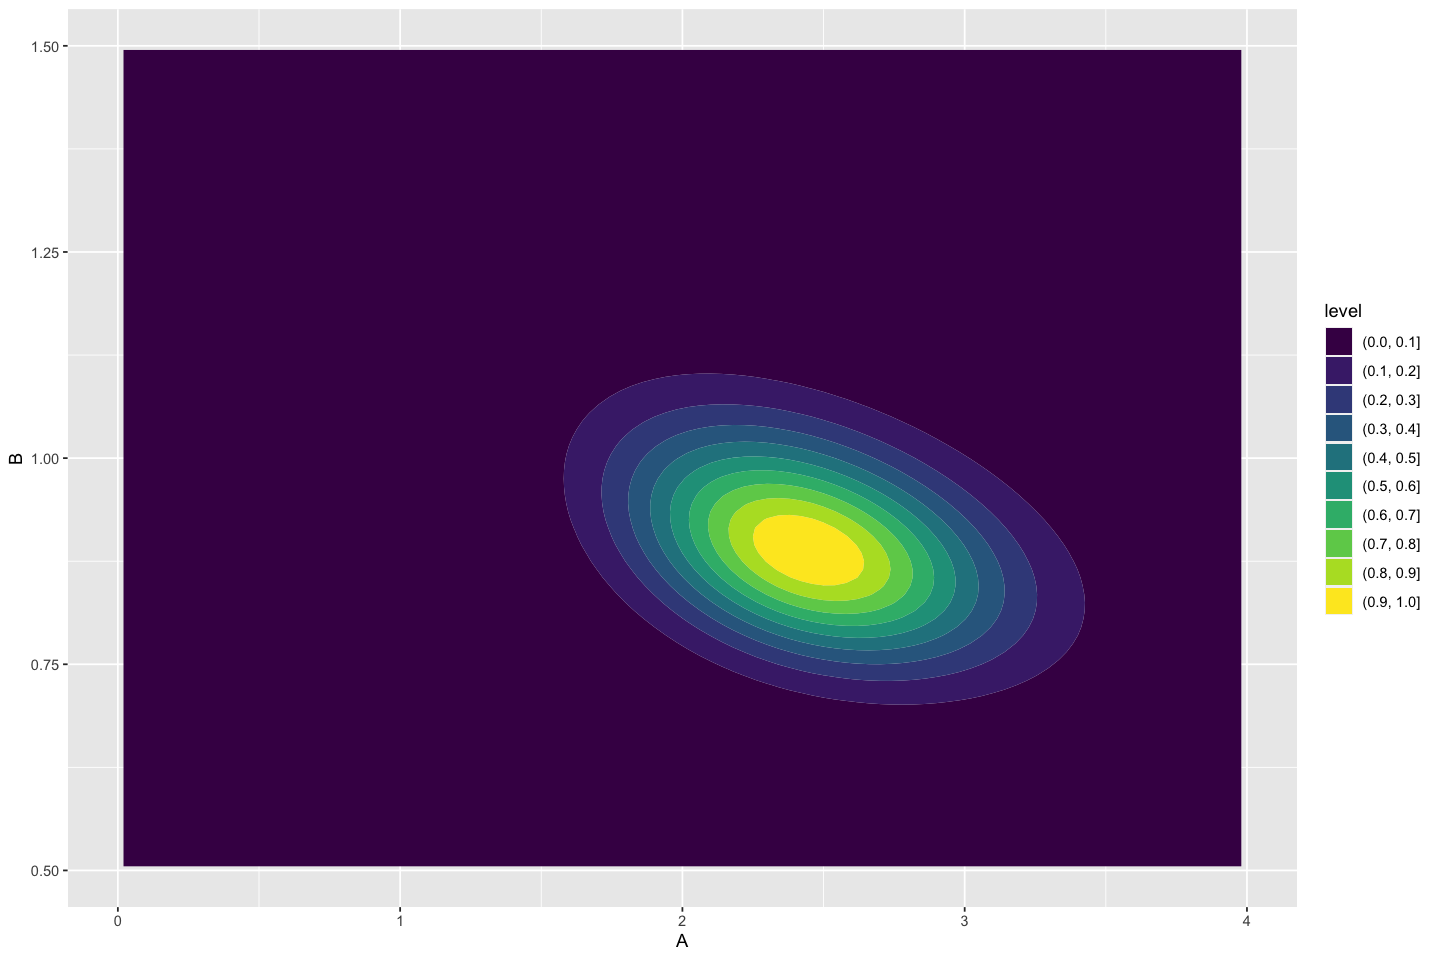

In [58]:
# generate observed data 
# with a loop over w

for(w in w_list) {

    x_k <- seq(-7*w, 7*w, 0.5*w)
    x_k_plot <- seq(min(x_k), max(x_k), 0.05*w)

    sig <- signal(x_k, A_true, B_true, x0, w, dt)
    sig_plot <- signal(x_k_plot, A_true, B_true, x0, w, dt)
    sig_data <- rpois(length(sig), sig)

    sigplot <- ggplot() + geom_col( aes(x = x_k, y = sig_data)) + geom_line(aes(x = x_k_plot, y = sig_plot))

    print(sigplot)

    # compute the log posterior, not normalized
    z <- matrix(0, nrow = length(a), ncol = length(b))

    for(j in 1:length(a)) {
        for(k in 1:length(b)) {
        z[j,k] <- logpost(sig_data, x_k, a[j], b[k], x0, w, dt)
        }
    }

    # set maximum to zero
    z <- z - max(z)

    # adjusting matrix
    ab_matrix <- expand.grid(a, b)
    ab_matrix <- cbind(ab_matrix, c(exp(z)))
    colnames(ab_matrix) <- c("A", "B", "posterior")

    # plot 2D posterior

    postplot_sig_bkg <- ggplot(ab_matrix) + geom_contour_filled(aes(x = A, y = B, z = posterior))
    print(postplot_sig_bkg)

}


#### 2. Change the ratio $A/B$ used to simulate the data (keeping both positive in accordance with the prior) and check the effect on the results

In [59]:
# model parameters
w <- 1
A_true <- c(0.5, 1, 2, 5, 10)
B_true <- 1

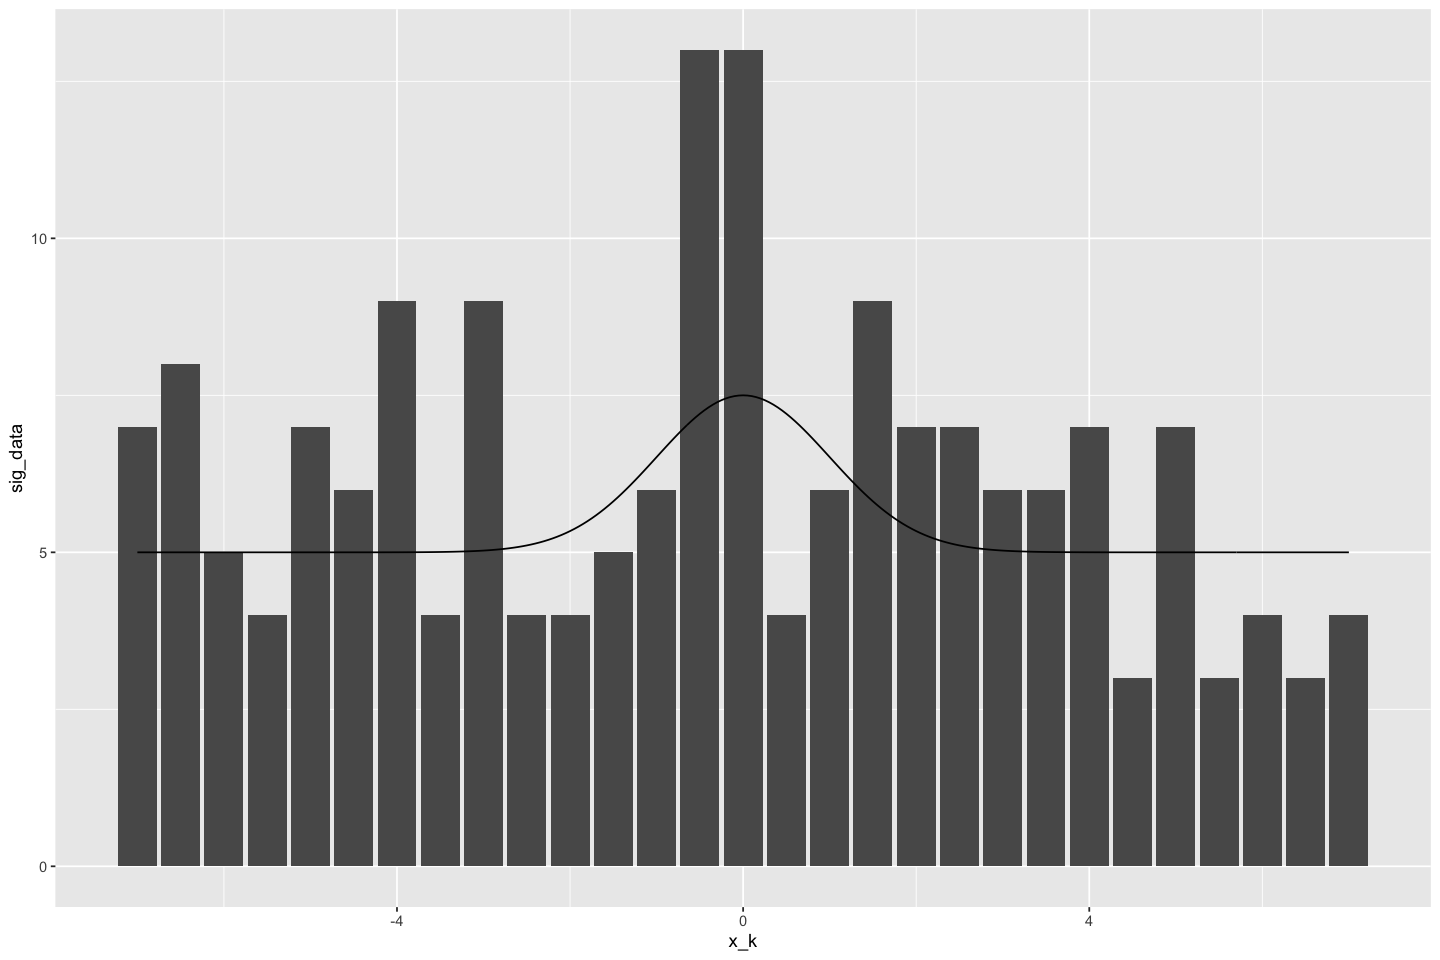

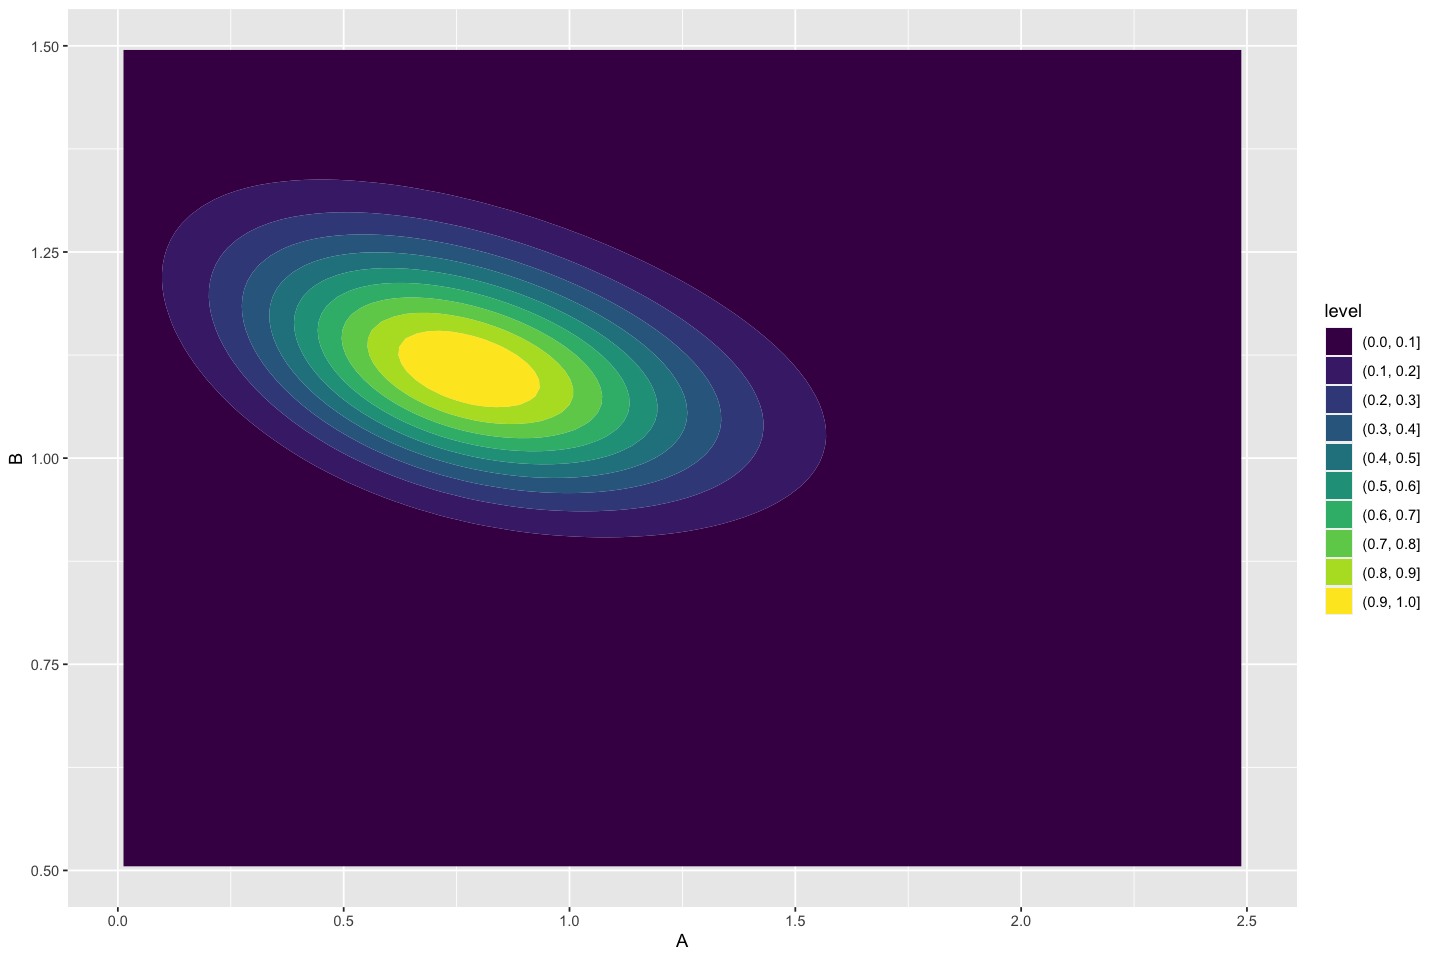

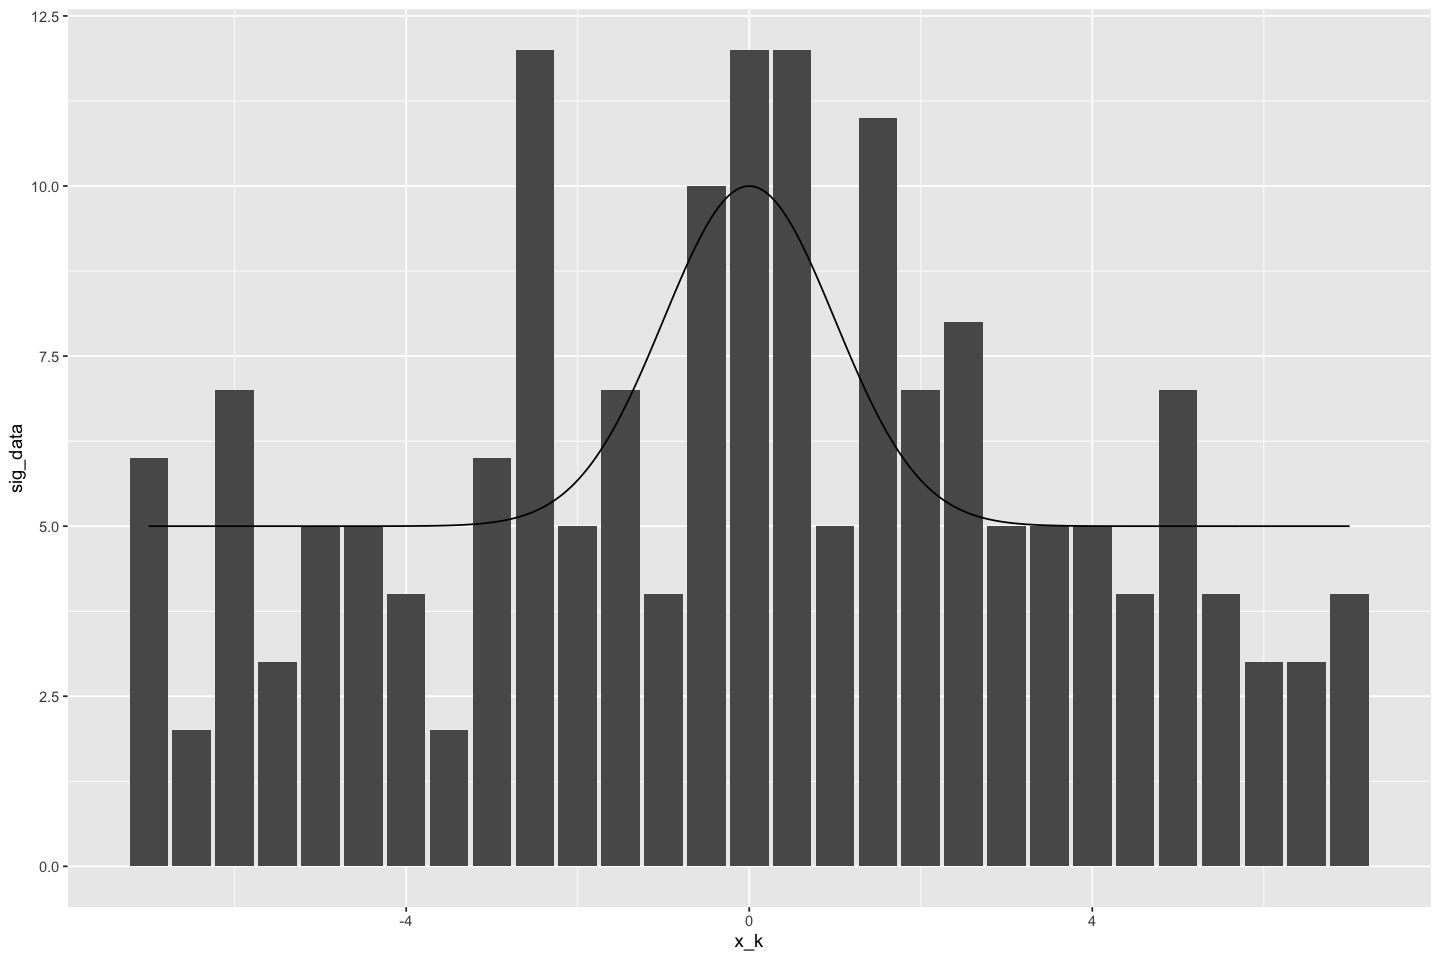

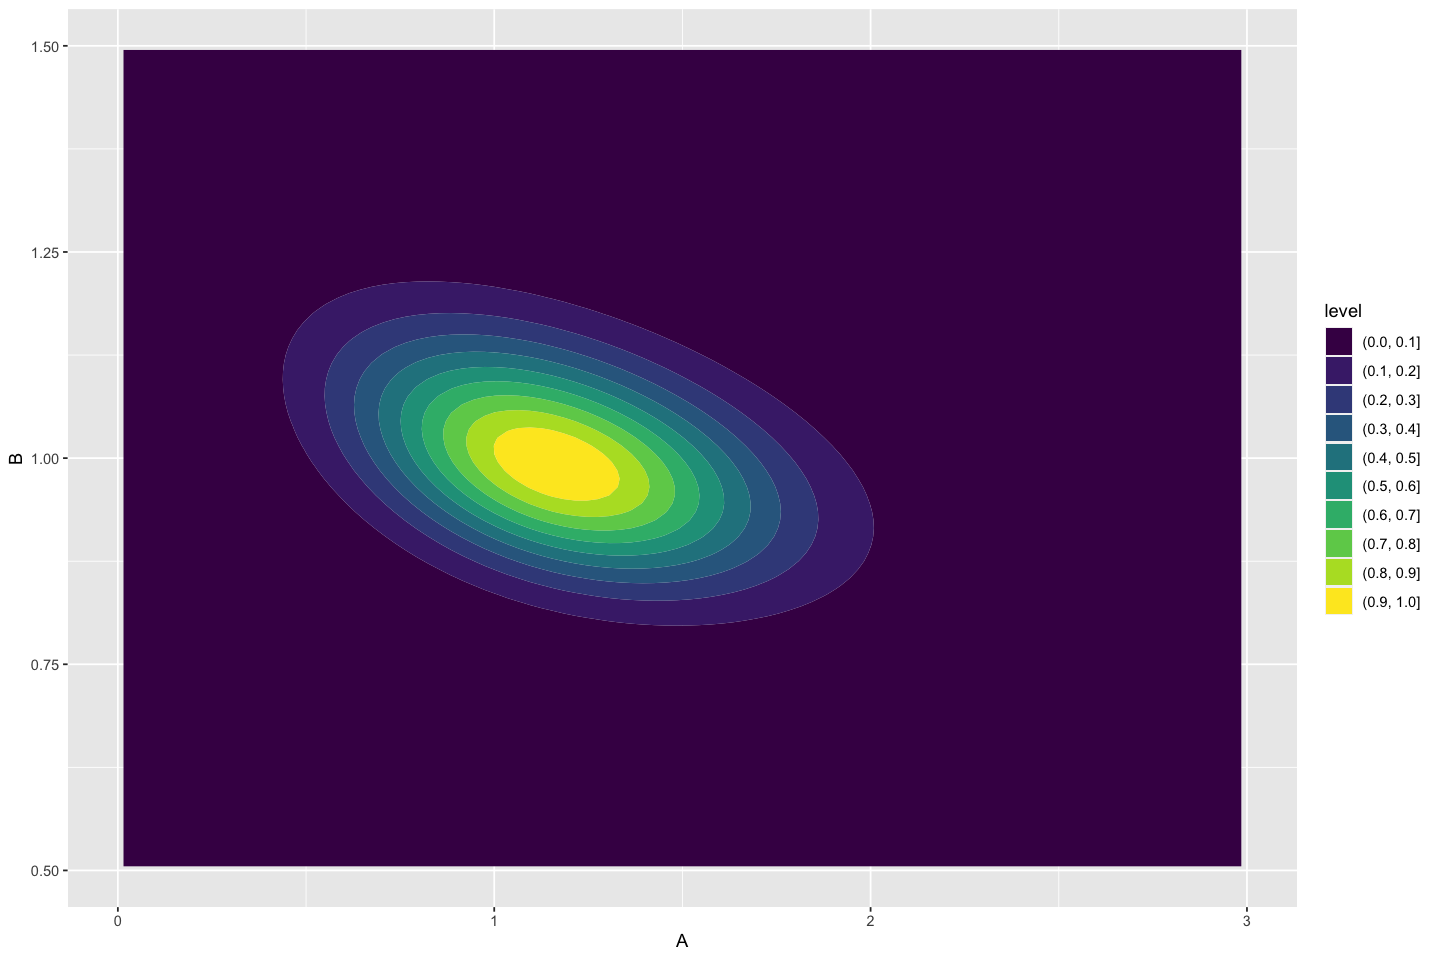

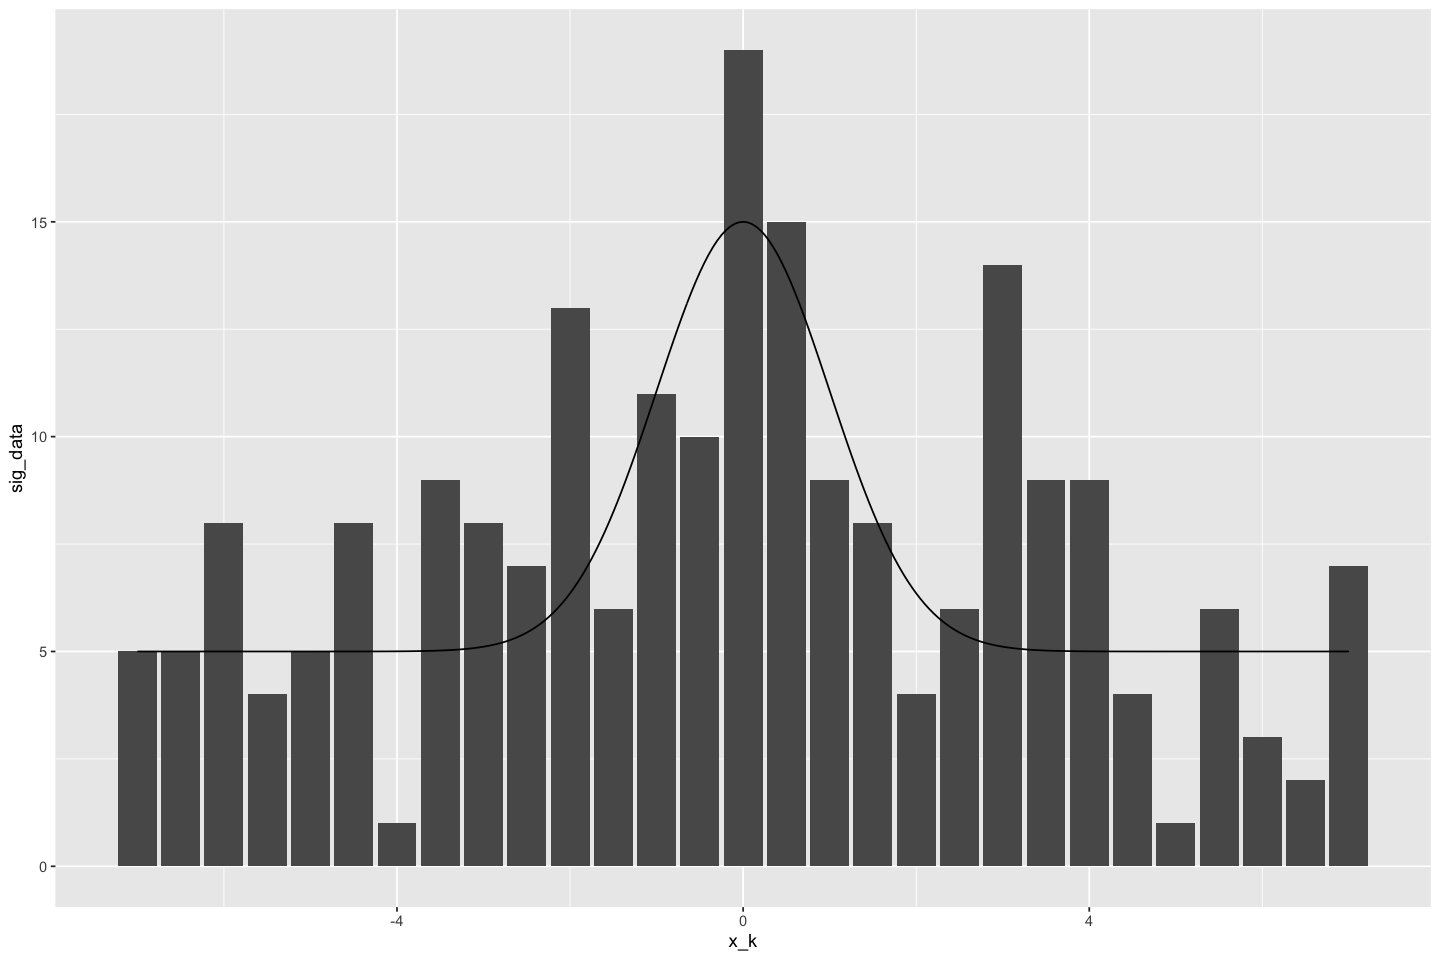

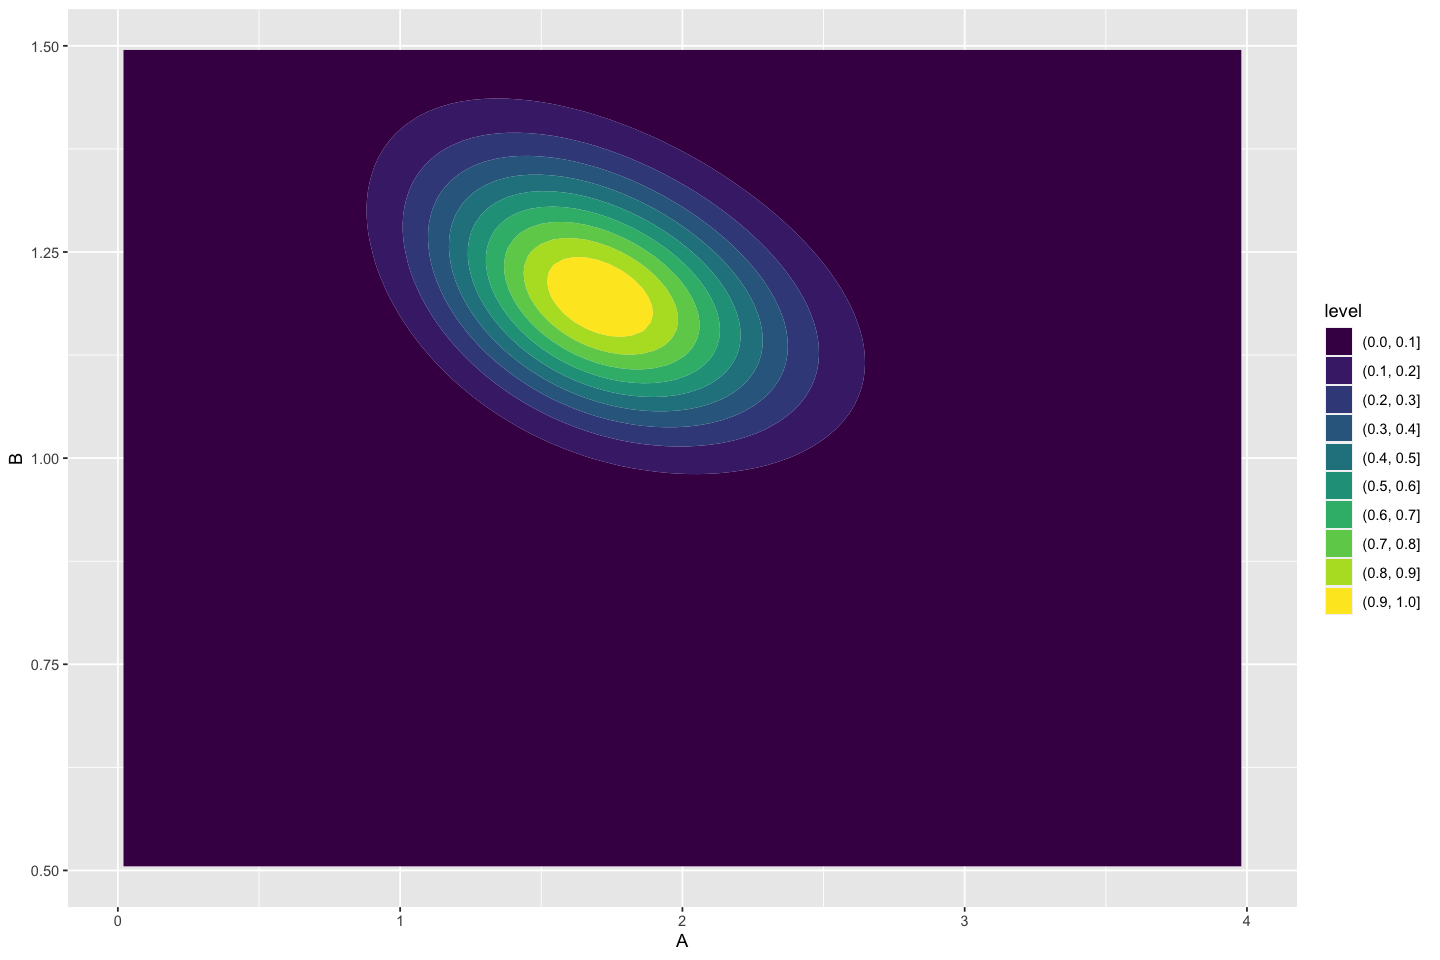

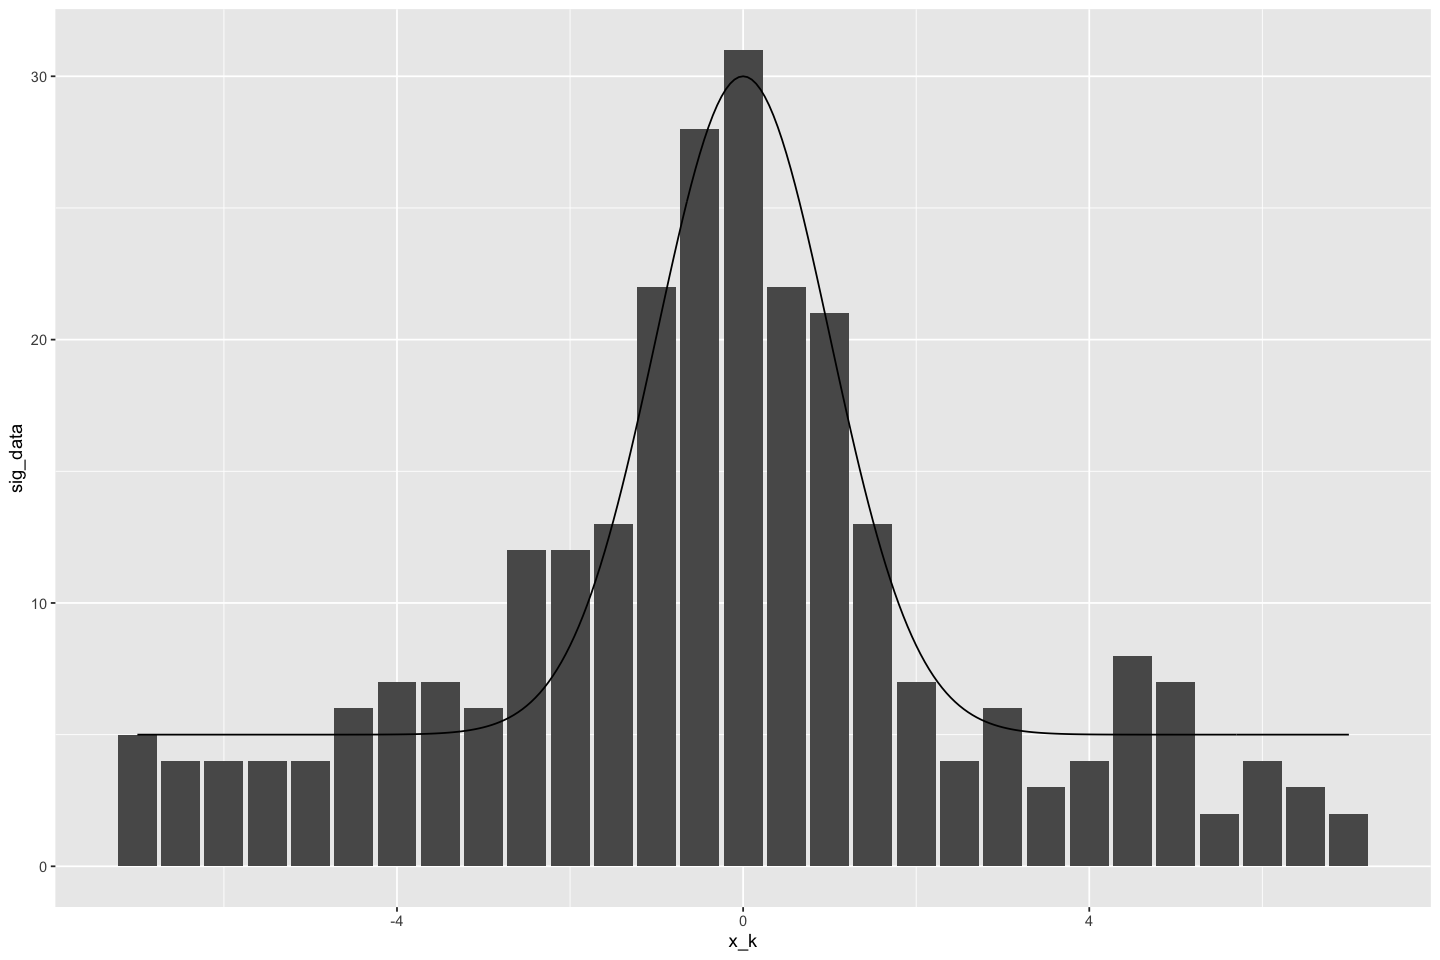

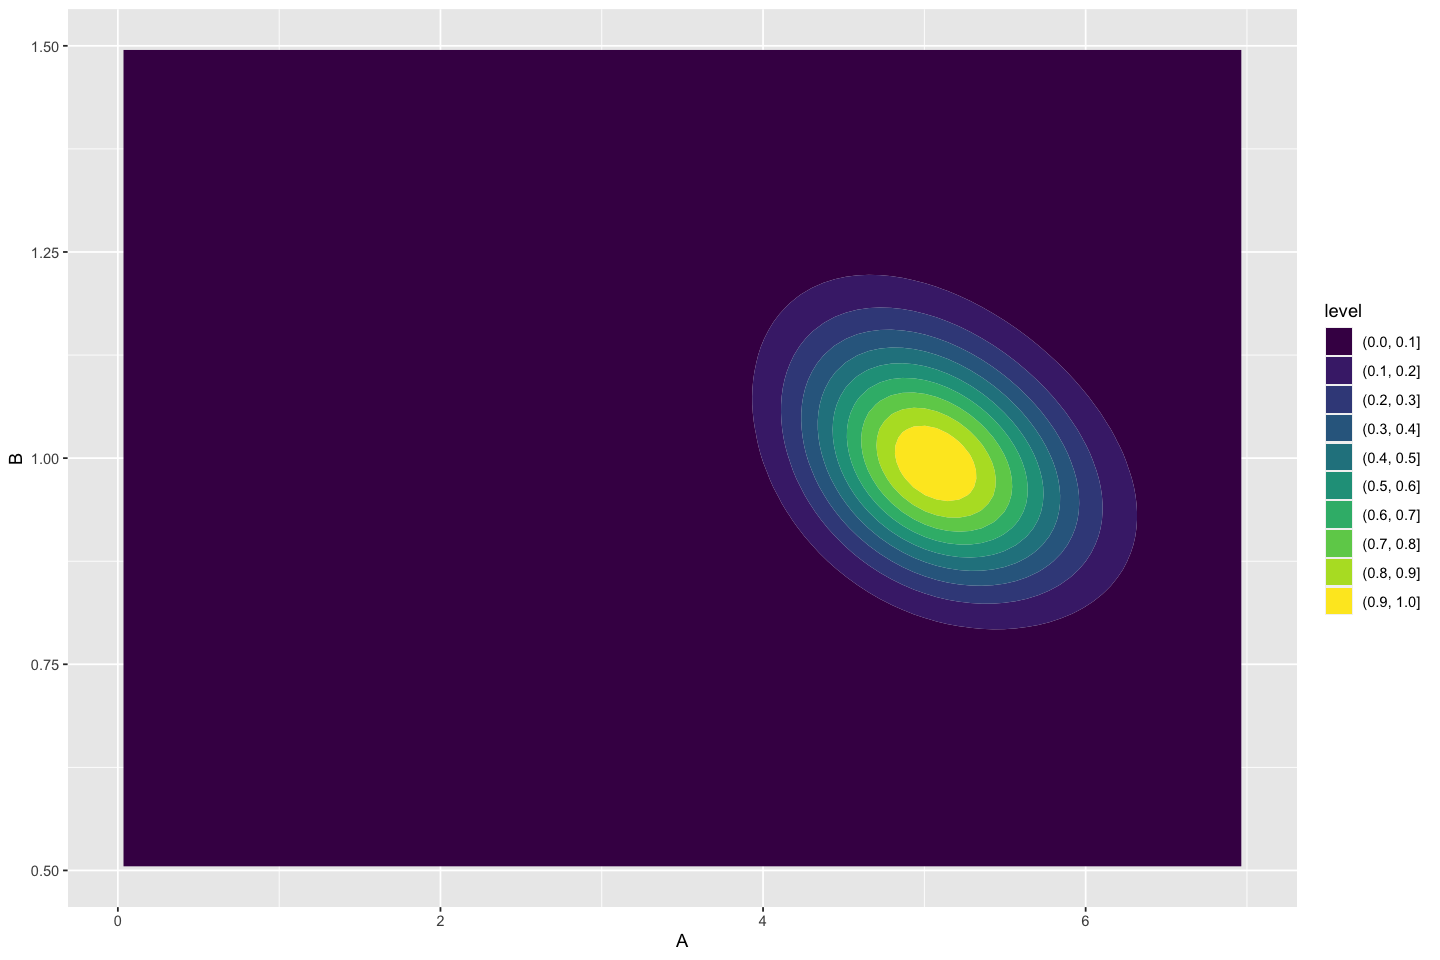

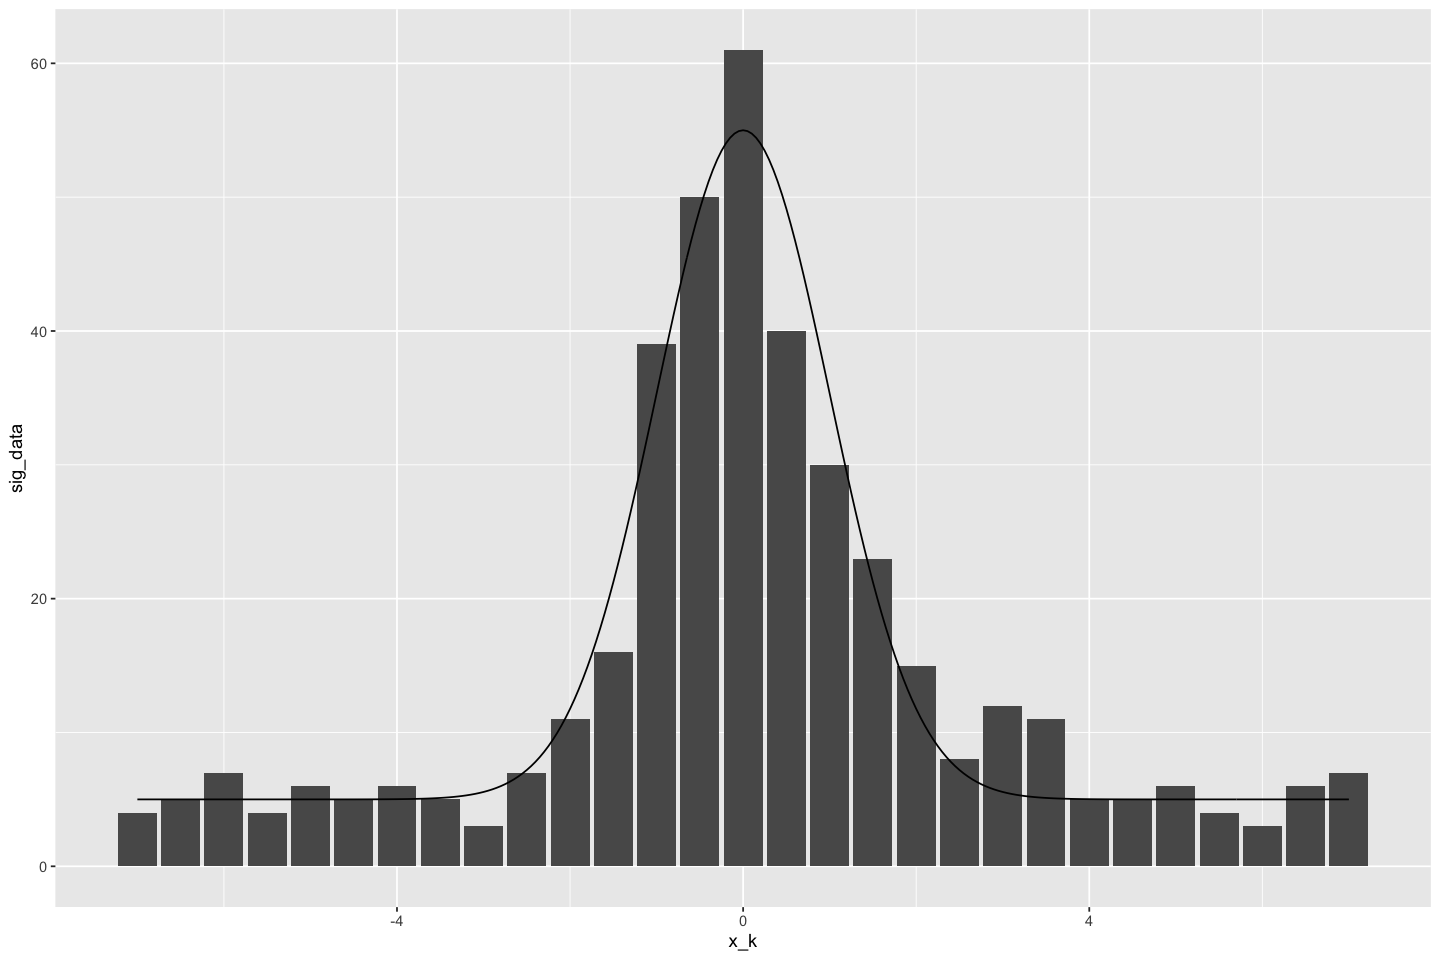

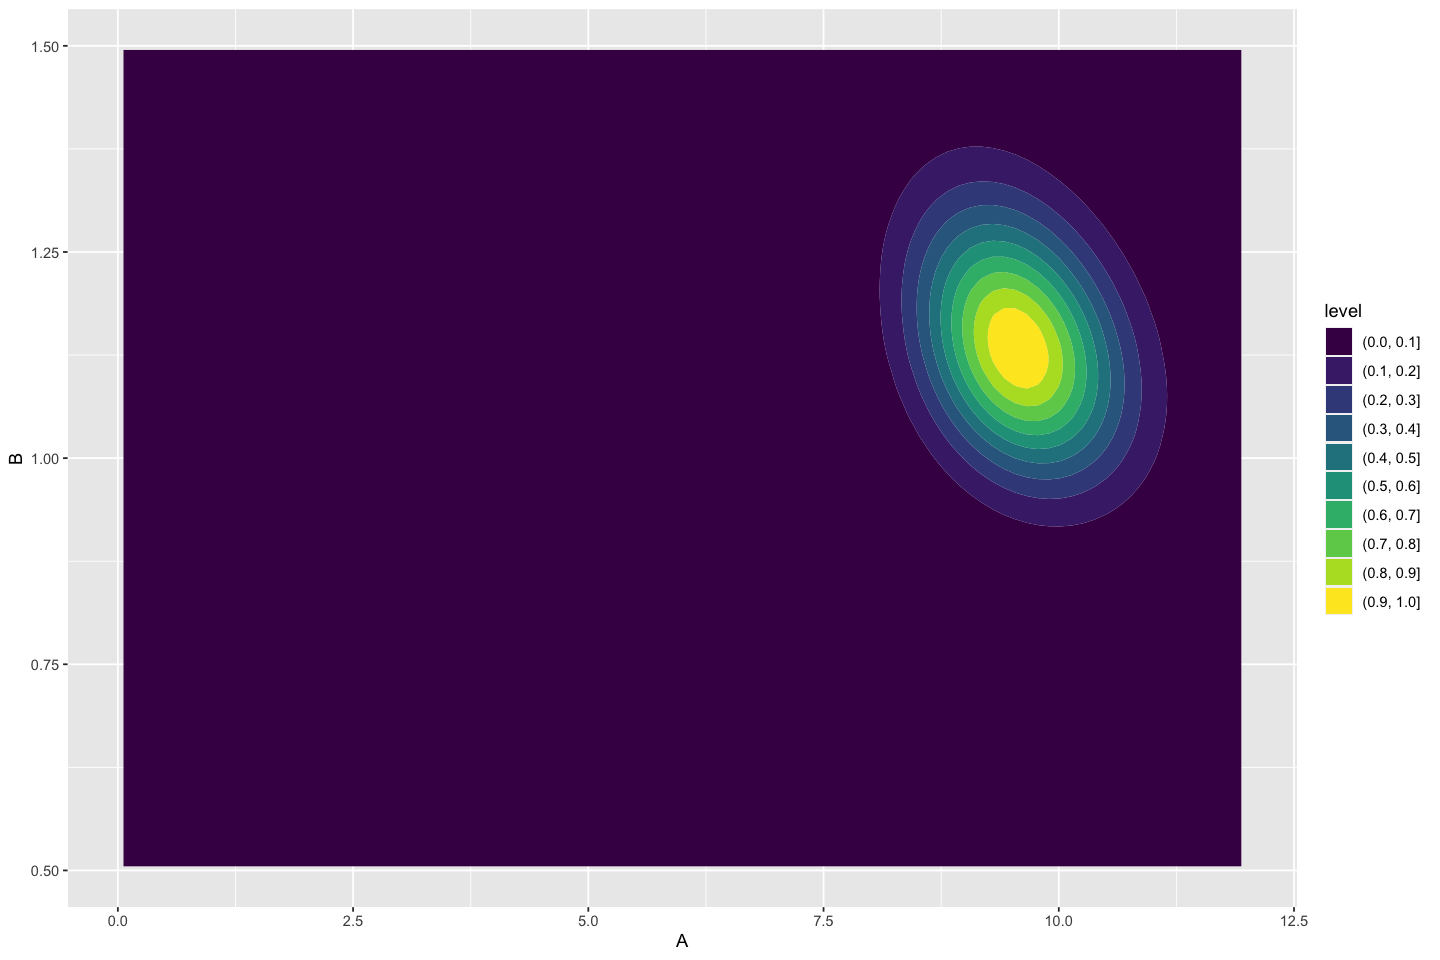

In [60]:
# with a loop over A

for(A in A_true) {

    # generate observed data 

    x_k <- seq(-7*w, 7*w, 0.5*w)
    x_k_plot <- seq(min(x_k), max(x_k), 0.05*w)

    sig <- signal(x_k, A, B_true, x0, w, dt)
    sig_plot <- signal(x_k_plot, A, B_true, x0, w, dt)

    sig_data <- rpois(length(sig), sig)

    sigplot <- ggplot() + 
               geom_col( aes(x = x_k, y = sig_data)) + 
               geom_line(aes(x = x_k_plot, y = sig_plot))

    print(sigplot)

    # sampling grid for compunting posterior

    alim <- c(0, A + 2)
    blim <- c(0.5, 1.5)
    N_sample <- 100
    uniGrid <- seq(1/(2*N_sample), 1-1/(2*N_sample), by = 1/N_sample)
    delta_a <- diff(alim)/N_sample
    delta_b <- diff(blim)/N_sample

    a <- alim[1] + diff(alim) * uniGrid
    b <- blim[1] + diff(blim) * uniGrid

    # compute the log posterior, not normalized
    z <- matrix(0, nrow = length(a), ncol = length(b))

    for(j in 1:length(a)) {
        for(k in 1:length(b)) {
        z[j,k] <- logpost(sig_data, x_k, a[j], b[k], x0, w, dt)
        }
    }

    # set maximum to zero
    z <- z - max(z)

    # adjusting matrix
    ab_matrix <- expand.grid(a, b)
    ab_matrix <- cbind(ab_matrix, c(exp(z)))
    colnames(ab_matrix) <- c("A", "B", "posterior")

    # plot 2D posterior

    postplot_sig_bkg <- ggplot(ab_matrix) + geom_contour_filled(aes(x = A, y = B, z = posterior))
    print(postplot_sig_bkg)

}
